# EDA_ASSIGNMENT #


#### PROBLEM_STATEMENT ####
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.


In [595]:
# Importing the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [596]:
# Importing the 'application_data' Dataset.
df1 = pd.read_csv("application_data.csv")
df1.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.500,29686.500,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.000,21865.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000


In [597]:
# Checking the shape of the Dataset.
df1.shape

(307511, 122)

According to the data shape, we can se we have around 3 lakh data of the customers and 122 columns related to the info collected from the banks about the coustomers.

### DATA CLEANING ###

One of the way of cleaning the data is by the understanding the number of null(nan) values present in the column.
If 50% of the data in the column is null, then the column can be removed

In [598]:
df1.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [599]:
null_percentage = (df1.isnull().sum() / len(df1)) * 100
null_percentage

SK_ID_CURR                    0.000
TARGET                        0.000
NAME_CONTRACT_TYPE            0.000
CODE_GENDER                   0.000
FLAG_OWN_CAR                  0.000
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY    13.502
AMT_REQ_CREDIT_BUREAU_WEEK   13.502
AMT_REQ_CREDIT_BUREAU_MON    13.502
AMT_REQ_CREDIT_BUREAU_QRT    13.502
AMT_REQ_CREDIT_BUREAU_YEAR   13.502
Length: 122, dtype: float64

In [600]:
threshold = 50

# Identify columns with null values above the threshold
columns_to_remove = null_percentage[null_percentage > threshold].index

# Print identified columns
print("Columns with null values exceeding 50%:")
for column in columns_to_remove:
    print(column)

Columns with null values exceeding 50%:
OWN_CAR_AGE
EXT_SOURCE_1
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE


In [601]:
len(columns_to_remove)

41

In [602]:
def remove_columns_with_high_nulls(dataframe, threshold= 50):
    # Calculate the percentage of null values in each column
    null_percentage = (dataframe.isnull().sum() / len(dataframe)) * 100

    # Identify columns with null values above the threshold
    columns_to_remove = null_percentage[null_percentage > threshold].index

    # Remove identified columns from the DataFrame
    dataframe_cleaned = dataframe.drop(columns=columns_to_remove)

    return dataframe_cleaned




In [603]:
df2 = remove_columns_with_high_nulls(df1)
df2.shape

(307511, 81)

After removing the columns which had more than 50% of null value, we have reduced the columns fromm 122 to 81,as 81 is still considerable a large number of data, we will try to understand the columns based on the description and try to understand how important they will be while analysing the data

In [604]:
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.500,29686.500,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.000,21865.500,...,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000


In [605]:
unwanted=['EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG' 
           ,  'YEARS_BEGINEXPLUATATION_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
           'FLOORSMAX_MODE',  'YEARS_BEGINEXPLUATATION_MEDI',  'FLOORSMAX_MEDI','HOUR_APPR_PROCESS_START',
           'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','FLAG_OWN_CAR','NAME_TYPE_SUITE','FLAG_MOBIL','FLAG_EMAIL','LIVE_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT_W_CITY','EMERGENCYSTATE_MODE','REGION_POPULATION_RELATIVE','AMT_GOODS_PRICE'
 ,'TOTALAREA_MODE','REGION_RATING_CLIENT','LIVE_REGION_NOT_WORK_REGION']

df2.drop(labels=unwanted,axis=1,inplace=True)

In [606]:
df2.shape

(307511, 30)

In [607]:
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,FLAG_PHONE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,Y,0,202500.000,406597.500,24700.500,Working,...,1,Laborers,1.000,WEDNESDAY,0,0,0,0,Business Entity Type 3,-1134.000
1,100003,0,Cash loans,F,N,0,270000.000,1293502.500,35698.500,State servant,...,1,Core staff,2.000,MONDAY,0,0,0,0,School,-828.000
2,100004,0,Revolving loans,M,Y,0,67500.000,135000.000,6750.000,Working,...,1,Laborers,1.000,MONDAY,0,0,0,0,Government,-815.000
3,100006,0,Cash loans,F,Y,0,135000.000,312682.500,29686.500,Working,...,0,Laborers,2.000,WEDNESDAY,0,0,0,0,Business Entity Type 3,-617.000
4,100007,0,Cash loans,M,Y,0,121500.000,513000.000,21865.500,Working,...,0,Core staff,1.000,THURSDAY,0,0,0,1,Religion,-1106.000


In [608]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_REALTY             307511 non-null  object 
 5   CNT_CHILDREN                307511 non-null  int64  
 6   AMT_INCOME_TOTAL            307511 non-null  float64
 7   AMT_CREDIT                  307511 non-null  float64
 8   AMT_ANNUITY                 307499 non-null  float64
 9   NAME_INCOME_TYPE            307511 non-null  object 
 10  NAME_EDUCATION_TYPE         307511 non-null  object 
 11  NAME_FAMILY_STATUS          307511 non-null  object 
 12  NAME_HOUSING_TYPE           307511 non-null  object 
 13  DAYS_BIRTH    

Checking various unique values given  in the columns.

In [609]:
df2['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [610]:
df2['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Since 4 rows have no data , we can either drop those rows or as female has majority ,we can update them with female because it won't be affecting much on the data.

In [611]:
df2 = df2[df2['CODE_GENDER'] != 'XNA']
df2['CODE_GENDER'].value_counts()

CODE_GENDER
F    202448
M    105059
Name: count, dtype: int64

In [612]:
df2['NAME_EDUCATION_TYPE'].value_counts()
 

NAME_EDUCATION_TYPE
Secondary / secondary special    218389
Higher education                  74862
Incomplete higher                 10276
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [613]:
df2['NAME_FAMILY_STATUS'].value_counts()


NAME_FAMILY_STATUS
Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

Even though unkown has 2 values we can either remove or we can keep the value as it is the weitage to that compared to others is to low.

In [614]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307507 non-null  int64  
 1   TARGET                      307507 non-null  int64  
 2   NAME_CONTRACT_TYPE          307507 non-null  object 
 3   CODE_GENDER                 307507 non-null  object 
 4   FLAG_OWN_REALTY             307507 non-null  object 
 5   CNT_CHILDREN                307507 non-null  int64  
 6   AMT_INCOME_TOTAL            307507 non-null  float64
 7   AMT_CREDIT                  307507 non-null  float64
 8   AMT_ANNUITY                 307495 non-null  float64
 9   NAME_INCOME_TYPE            307507 non-null  object 
 10  NAME_EDUCATION_TYPE         307507 non-null  object 
 11  NAME_FAMILY_STATUS          307507 non-null  object 
 12  NAME_HOUSING_TYPE           307507 non-null  object 
 13  DAYS_BIRTH         

In [615]:
df2.shape

(307507, 30)

In [616]:
data_null_value_percentage = df2.isnull().sum()/df2.shape[0]*100
data_null_value_percentage

SK_ID_CURR                    0.000
TARGET                        0.000
NAME_CONTRACT_TYPE            0.000
CODE_GENDER                   0.000
FLAG_OWN_REALTY               0.000
CNT_CHILDREN                  0.000
AMT_INCOME_TOTAL              0.000
AMT_CREDIT                    0.000
AMT_ANNUITY                   0.004
NAME_INCOME_TYPE              0.000
NAME_EDUCATION_TYPE           0.000
NAME_FAMILY_STATUS            0.000
NAME_HOUSING_TYPE             0.000
DAYS_BIRTH                    0.000
DAYS_EMPLOYED                 0.000
DAYS_REGISTRATION             0.000
DAYS_ID_PUBLISH               0.000
FLAG_EMP_PHONE                0.000
FLAG_WORK_PHONE               0.000
FLAG_CONT_MOBILE              0.000
FLAG_PHONE                    0.000
OCCUPATION_TYPE              31.345
CNT_FAM_MEMBERS               0.001
WEEKDAY_APPR_PROCESS_START    0.000
REG_REGION_NOT_LIVE_REGION    0.000
REG_REGION_NOT_WORK_REGION    0.000
REG_CITY_NOT_LIVE_CITY        0.000
REG_CITY_NOT_WORK_CITY      

CHECKING FOR OUTLIERS

<Axes: ylabel='AMT_ANNUITY'>

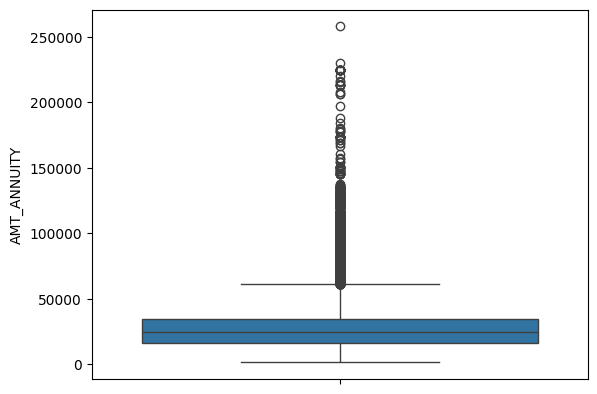

In [617]:
sns.boxplot(df2['AMT_ANNUITY'])


<Axes: ylabel='AMT_INCOME_TOTAL'>

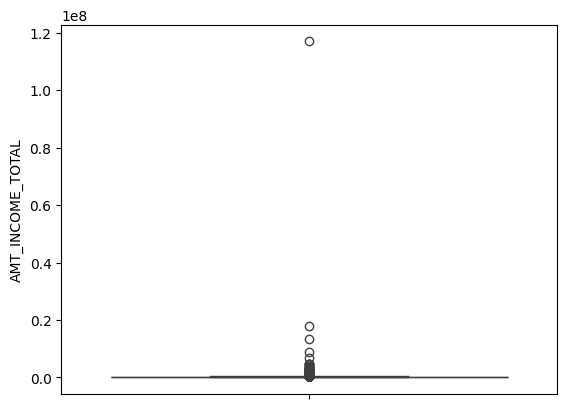

In [618]:
sns.boxplot(df2['AMT_INCOME_TOTAL'])




<Axes: ylabel='AMT_CREDIT'>

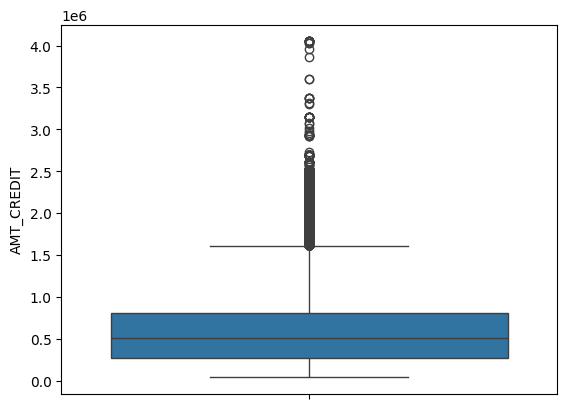

In [619]:
sns.boxplot(df2['AMT_CREDIT'])


We see there is significant amount of outliers, as it is a continous variable rather than replacing null values with mean or median and as there are significant number of outliers , we will be  use binning for data analysis.

In [620]:
df2.AMT_ANNUITY.describe()

count   307495.000
mean     27108.667
std      14493.798
min       1615.500
25%      16524.000
50%      24903.000
75%      34596.000
max     258025.500
Name: AMT_ANNUITY, dtype: float64

In [621]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df2.AMT_INCOME_TOTAL.describe()

count      307507.000
mean       168797.686
std        237124.627
min         25650.000
25%        112500.000
50%        147150.000
75%        202500.000
max     117000000.000
Name: AMT_INCOME_TOTAL, dtype: float64

In [622]:
df2.AMT_CREDIT.describe()

count    307507.000
mean     599028.597
std      402492.602
min       45000.000
25%      270000.000
50%      513531.000
75%      808650.000
max     4050000.000
Name: AMT_CREDIT, dtype: float64

In [623]:
# Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df2['AMT_INCOME_RANGE']=pd.cut(df2['AMT_INCOME_TOTAL'],bins,labels=slot)

In [624]:

# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df2['AMT_CREDIT_RANGE']=pd.cut(df2['AMT_CREDIT'],bins=bins,labels=slots)

In [625]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']



df2['AMT_ANNUITY_RANGE']=pd.cut(df2['AMT_ANNUITY'],bins=bins,labels=slots)

In [626]:
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE
0,100002,1,Cash loans,M,Y,0,202500.000,406597.500,24700.500,Working,...,WEDNESDAY,0,0,0,0,Business Entity Type 3,-1134.000,200000-225000,400000-450000,0-150000
1,100003,0,Cash loans,F,N,0,270000.000,1293502.500,35698.500,State servant,...,MONDAY,0,0,0,0,School,-828.000,250000-275000,900000 and above,0-150000
2,100004,0,Revolving loans,M,Y,0,67500.000,135000.000,6750.000,Working,...,MONDAY,0,0,0,0,Government,-815.000,50000-75000,0-150000,0-150000
3,100006,0,Cash loans,F,Y,0,135000.000,312682.500,29686.500,Working,...,WEDNESDAY,0,0,0,0,Business Entity Type 3,-617.000,125000-150000,300000-350000,0-150000
4,100007,0,Cash loans,M,Y,0,121500.000,513000.000,21865.500,Working,...,THURSDAY,0,0,0,1,Religion,-1106.000,100000-125000,500000-550000,0-150000


In [627]:
# Standardizing the DAYS_BIRTH Column, DAYS_REGISTRATION,DAYS_ID_PUBLISH .
df2["DAYS_BIRTH"] = abs(df2.DAYS_BIRTH)/365
df2["DAYS_REGISTRATION"] = abs(df2.DAYS_REGISTRATION)/365
df2["DAYS_ID_PUBLISH"] = abs(df2.DAYS_ID_PUBLISH)/365


In [628]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307507 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307507 non-null  int64   
 1   TARGET                      307507 non-null  int64   
 2   NAME_CONTRACT_TYPE          307507 non-null  object  
 3   CODE_GENDER                 307507 non-null  object  
 4   FLAG_OWN_REALTY             307507 non-null  object  
 5   CNT_CHILDREN                307507 non-null  int64   
 6   AMT_INCOME_TOTAL            307507 non-null  float64 
 7   AMT_CREDIT                  307507 non-null  float64 
 8   AMT_ANNUITY                 307495 non-null  float64 
 9   NAME_INCOME_TYPE            307507 non-null  object  
 10  NAME_EDUCATION_TYPE         307507 non-null  object  
 11  NAME_FAMILY_STATUS          307507 non-null  object  
 12  NAME_HOUSING_TYPE           307507 non-null  object  
 13  DAYS

In [629]:
df2.drop("AMT_INCOME_TOTAL",axis=1,inplace=True)
df2.drop("AMT_ANNUITY",axis=1,inplace=True)

df2.shape


(307507, 31)

# DATA ANALYSIS #

* TARGET 
* CODE_GENDER
* NAME_EDUCATION_TYPE
* NAME_INCOME_TYPE
* NAME_HOUSING_TYPE
* NAME_FAMILY_STATUS
* FLAG_OWN_REALTY
* FLAG_OWN_CAR
* OCCUPATION_TYPE

APPROVED
CANCELLED
REFUSED
UNUSED

 ###### TARGET IS THE MAIN COLUMN WHICH HAS DETAILS ABOUT LOAN DEFAULTERS AND PEOPLE WHO PAY THE LOAN ON-TIME.
 ###### Let's analyse that column. #######

In [630]:
df2.TARGET.value_counts()

TARGET
0    282682
1     24825
Name: count, dtype: int64

 ###### We can see there is large imbalance in data set. Let's try plot the graph  #######

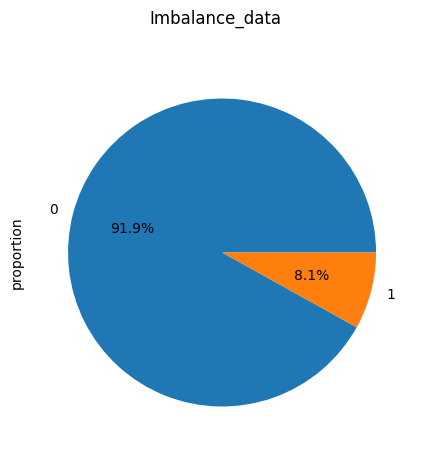

In [631]:
imbalance_data = df2['TARGET'].value_counts(normalize=True) * 100
plot = imbalance_data.plot.pie(y=df2['TARGET'], figsize=(5, 5), autopct='%1.1f%%', subplots=True,title='Imbalance_data')

##### From the plot we can see, ####
   ###### * Around 92% of people have no issue in paying the loan on-time ######
   ###### * Only 8.1% of people have issue and are finding difficulty in paying back loan. #####
###### Since the data is highly imbalnced , we will be creating 2 dataset one is with df2_target0  and another is df2_target1. #
 

In [632]:
df2.CODE_GENDER.value_counts()

CODE_GENDER
F    202448
M    105059
Name: count, dtype: int64

### Dividing the DATASET into Two Dataframes based on the Target Variable

In [633]:
df2_target0 = df2[df2.TARGET == 0]
df2_target1 = df2[df2.TARGET == 1]

In [634]:
df2_target0.shape

(282682, 31)

In [635]:
df2_target1.shape

(24825, 31)

##### AS WE HAVE 2 DATSETS BASED ON TARGET. LET'S PERFORM ANALYSIS ON THOSE TWO DATA SET

In [636]:
df2_target0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282682 entries, 1 to 307510
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  282682 non-null  int64   
 1   TARGET                      282682 non-null  int64   
 2   NAME_CONTRACT_TYPE          282682 non-null  object  
 3   CODE_GENDER                 282682 non-null  object  
 4   FLAG_OWN_REALTY             282682 non-null  object  
 5   CNT_CHILDREN                282682 non-null  int64   
 6   AMT_CREDIT                  282682 non-null  float64 
 7   NAME_INCOME_TYPE            282682 non-null  object  
 8   NAME_EDUCATION_TYPE         282682 non-null  object  
 9   NAME_FAMILY_STATUS          282682 non-null  object  
 10  NAME_HOUSING_TYPE           282682 non-null  object  
 11  DAYS_BIRTH                  282682 non-null  float64 
 12  DAYS_EMPLOYED               282682 non-null  int64   
 13  DAYS

In [637]:
df2_target0.CODE_GENDER.value_counts()

CODE_GENDER
F    188278
M     94404
Name: count, dtype: int64

<Axes: title={'center': 'Target0'}, xlabel='CODE_GENDER', ylabel='count'>

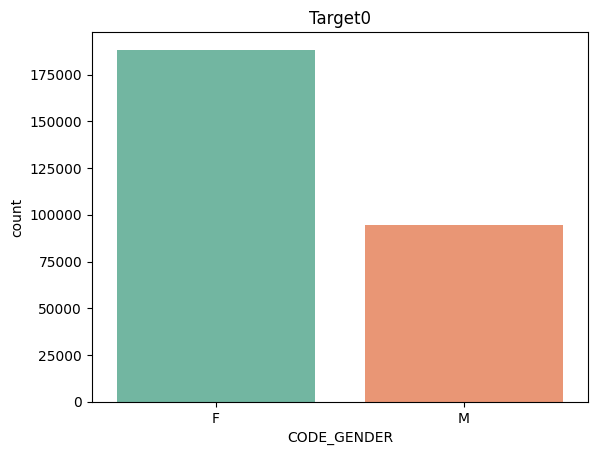

In [638]:
plt.title('Target0')
sns.countplot(x= 'CODE_GENDER', data=df2_target0, palette="Set2", hue= 'CODE_GENDER' , legend=False)

###### We can see that majority  females have paid the loan on time and males considerably very less.

<Axes: title={'center': 'Target1'}, xlabel='CODE_GENDER', ylabel='count'>

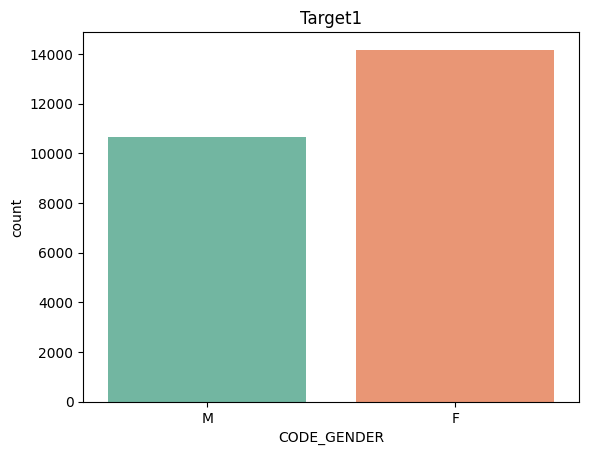

In [639]:
plt.title('Target1')
sns.countplot(x= 'CODE_GENDER', data=df2_target1, palette="Set2", hue= 'CODE_GENDER' , legend=False)

###### We can see that majority  females are in loan deafaulters list

<Axes: title={'center': 'Target0'}, xlabel='NAME_INCOME_TYPE', ylabel='count'>

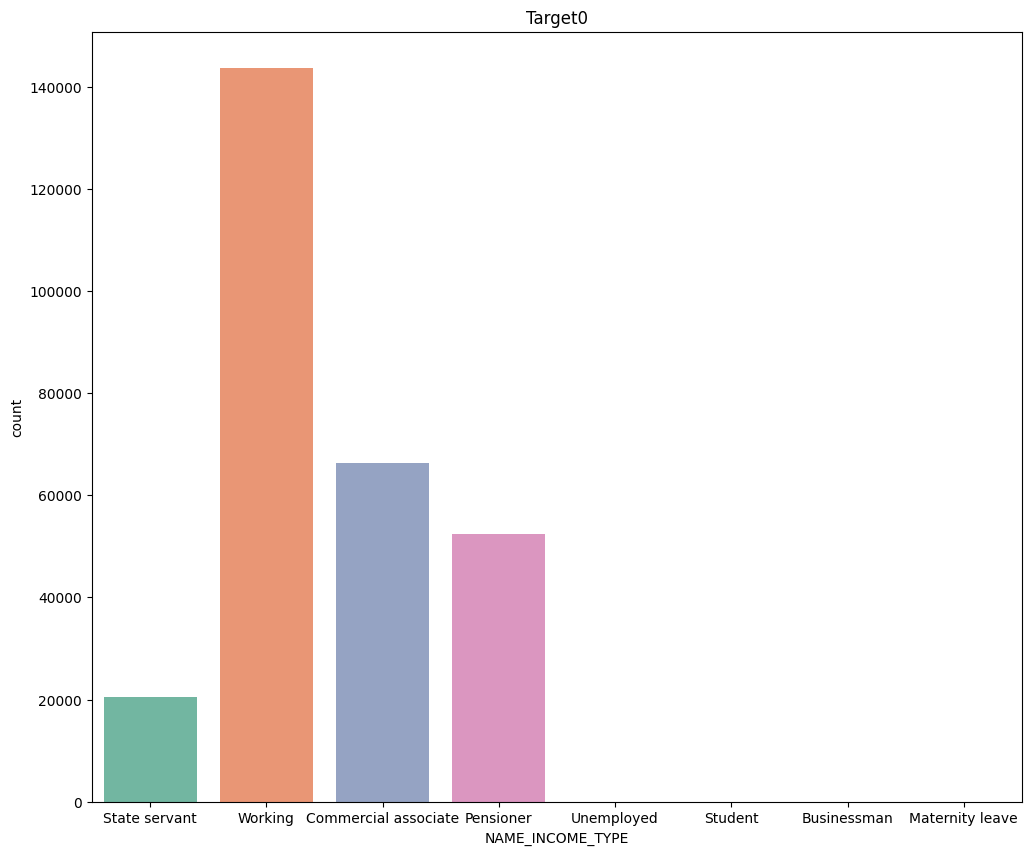

In [640]:
plt.figure(figsize=(12, 10))  
plt.title('Target0')

sns.countplot(x= 'NAME_INCOME_TYPE', data=df2_target0, palette="Set2", hue= 'NAME_INCOME_TYPE' , legend=False )

<Axes: title={'center': 'Target1'}, xlabel='NAME_INCOME_TYPE', ylabel='count'>

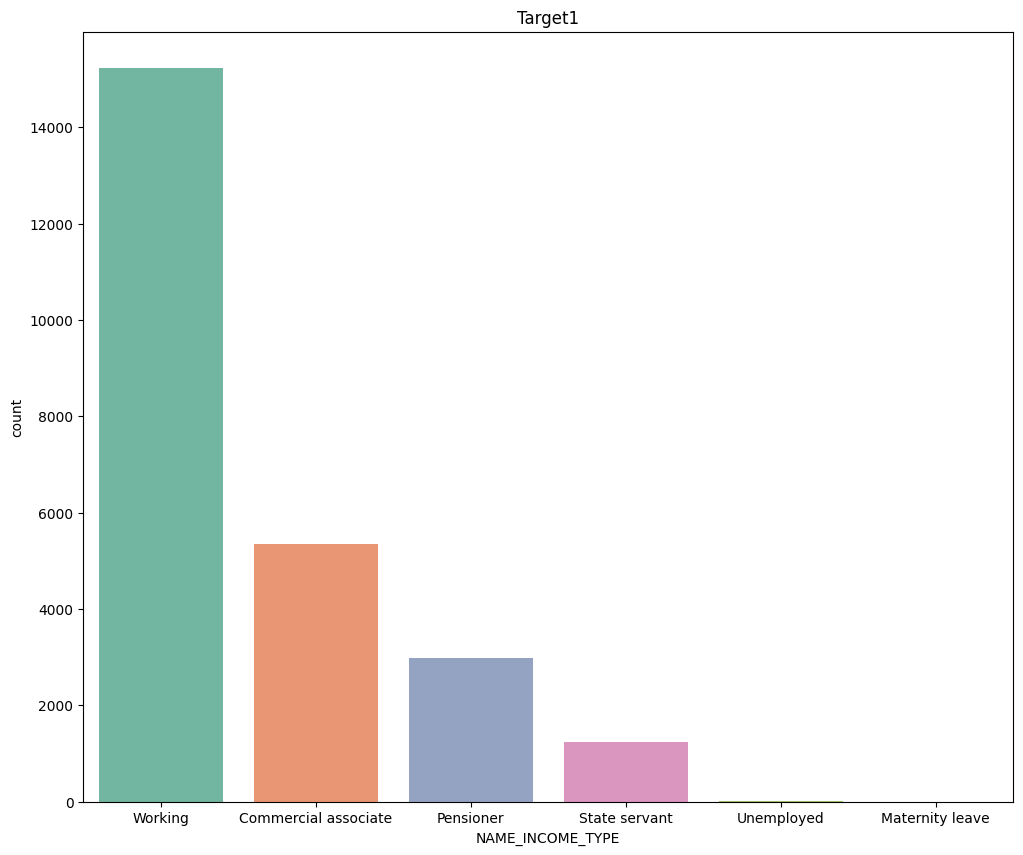

In [641]:
plt.figure(figsize=(12, 10))  
plt.title('Target1')

sns.countplot(x= 'NAME_INCOME_TYPE', data=df2_target1, palette="Set2", hue= 'NAME_INCOME_TYPE' , legend=False )

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

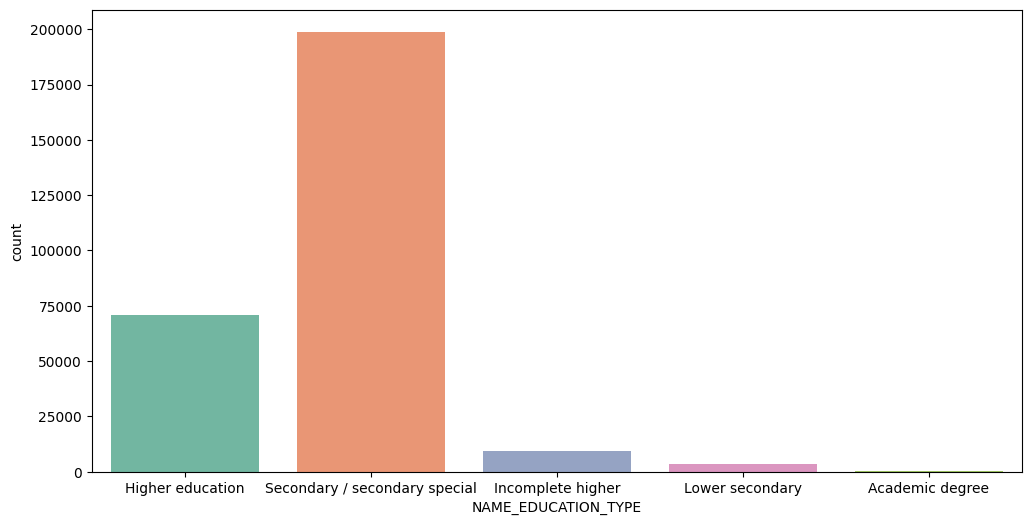

In [642]:
plt.figure(figsize=(12, 6))  
sns.countplot(x= 'NAME_EDUCATION_TYPE', data=df2_target0, palette="Set2", hue= 'NAME_EDUCATION_TYPE' , legend=False )

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

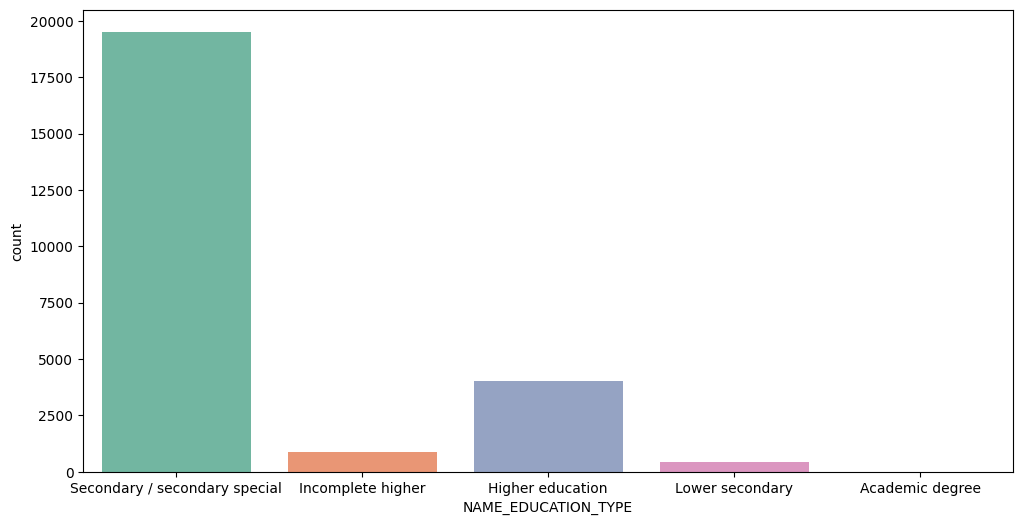

In [643]:
plt.figure(figsize=(12, 6))  
sns.countplot(x= 'NAME_EDUCATION_TYPE', data=df2_target1, palette="Set2", hue= 'NAME_EDUCATION_TYPE' , legend=False )

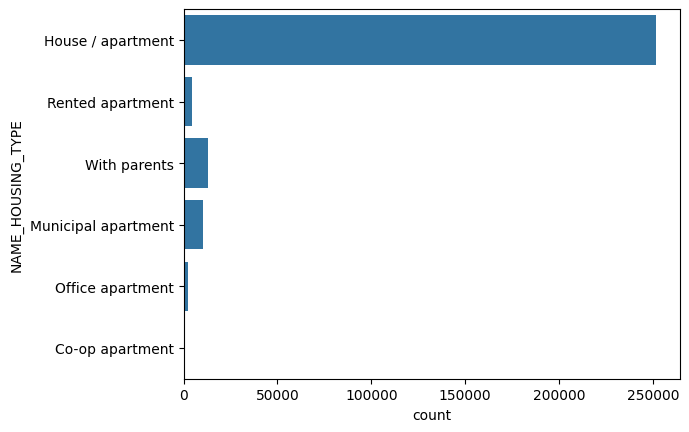

In [644]:
sns.countplot(y="NAME_HOUSING_TYPE", data= df2_target0)
plt.show()

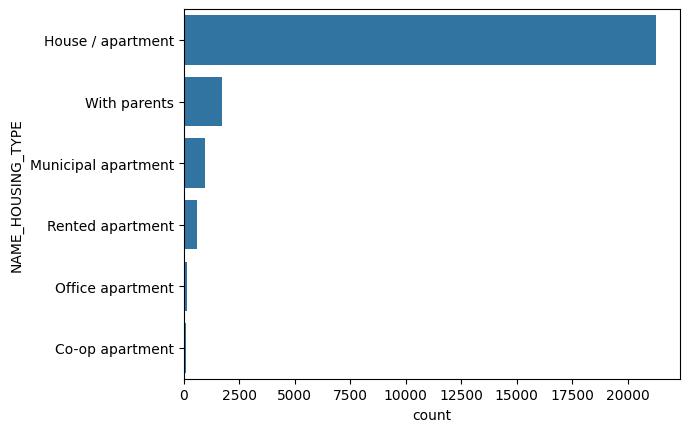

In [645]:
sns.countplot(y="NAME_HOUSING_TYPE", data= df2_target1)
plt.show()

### we can see the count of various column but , while giving a presentation having them in a percentage is much more preferred then the numbers. so lets plot pie chart of the following


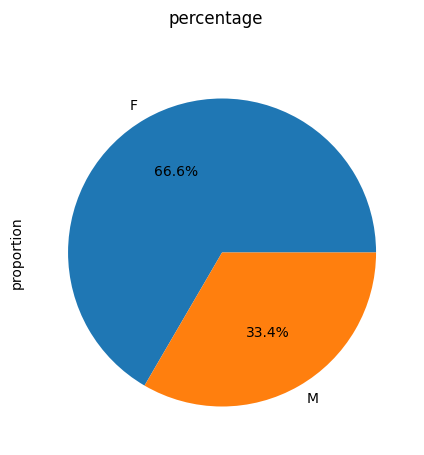

In [646]:
pie_chart_gender = df2_target0['CODE_GENDER'].value_counts(normalize=True) * 100
plot = pie_chart_gender.plot.pie(y=df2_target0['CODE_GENDER'], figsize=(5, 5), autopct='%1.1f%%', subplots=True,title='percentage')

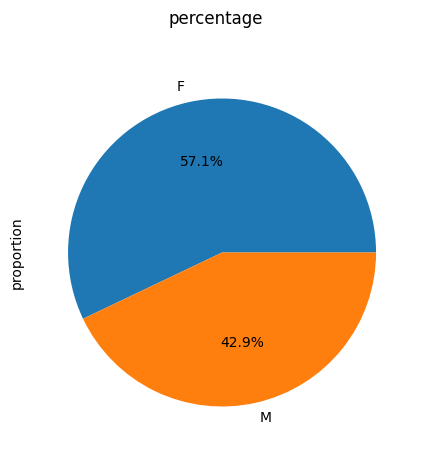

In [647]:
pie_chart_gender = df2_target1['CODE_GENDER'].value_counts(normalize=True) * 100
plot = pie_chart_gender.plot.pie(y=df2_target1['CODE_GENDER'], figsize=(5, 5), autopct='%1.1f%%', subplots=True,title='percentage')

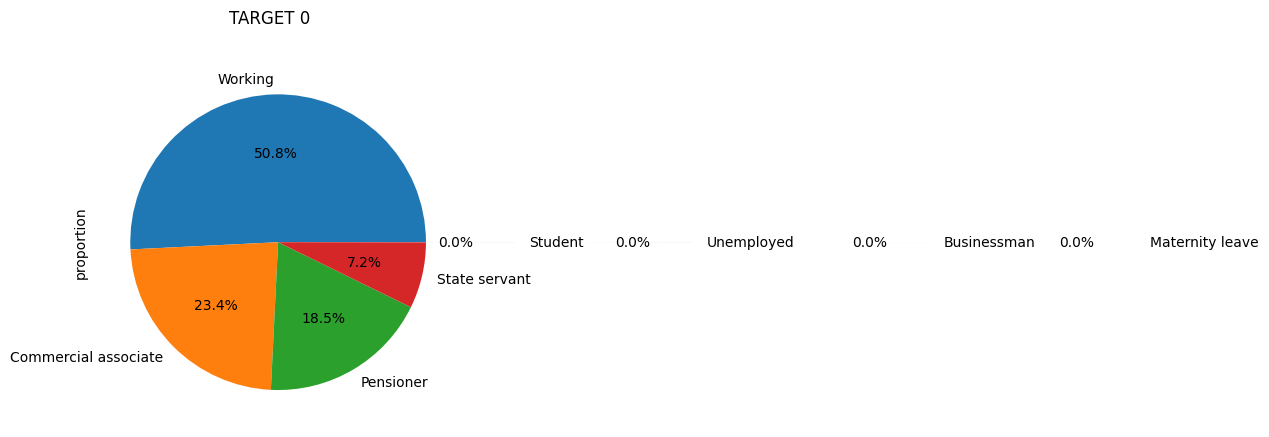

In [648]:
pie_chart_gender = df2_target0['NAME_INCOME_TYPE'].value_counts(normalize=True) * 100
explode= (0,0,0,0,0.6, 1.8,3.4,4.8)


plot = pie_chart_gender.plot.pie(y=df2_target0['NAME_INCOME_TYPE'], autopct='%1.1f%%', subplots=True,title='TARGET 0',explode= explode)

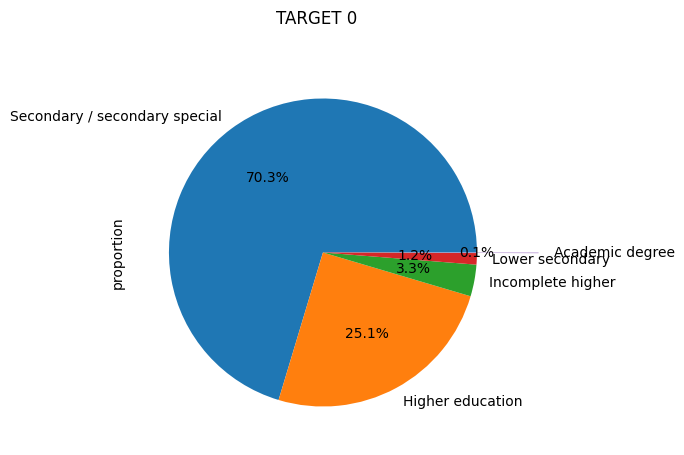

In [649]:
pie_chart_gender = df2_target0['NAME_EDUCATION_TYPE'].value_counts(normalize=True) * 100
explode= (0,0,0,0,0.4)

plot = pie_chart_gender.plot.pie(y=df2_target0['NAME_EDUCATION_TYPE'], figsize=(5, 5), autopct='%1.1f%%', subplots=True,title='TARGET 0',explode=explode)

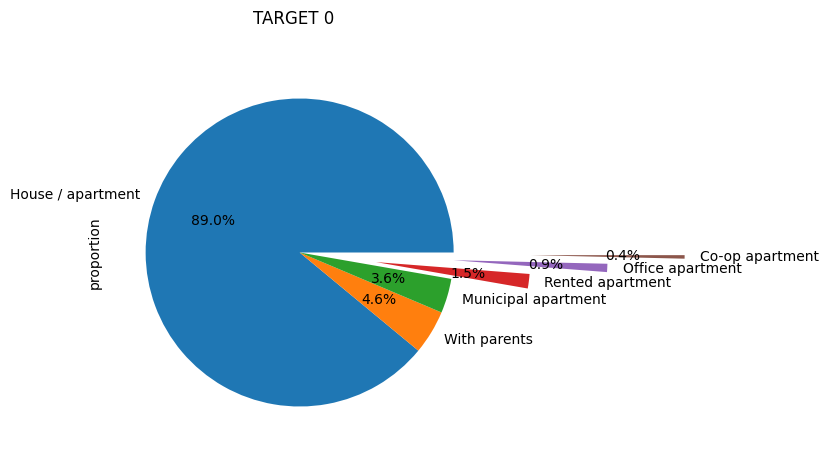

In [650]:
pie_chart_gender = df2_target0['NAME_HOUSING_TYPE'].value_counts(normalize=True) * 100
explode= (0,0,0,0.5,1.0,1.5)
plot = pie_chart_gender.plot.pie(y=df2_target0['NAME_HOUSING_TYPE'], figsize=(5, 5), autopct='%1.1f%%', subplots=True,title='TARGET 0',explode=explode)

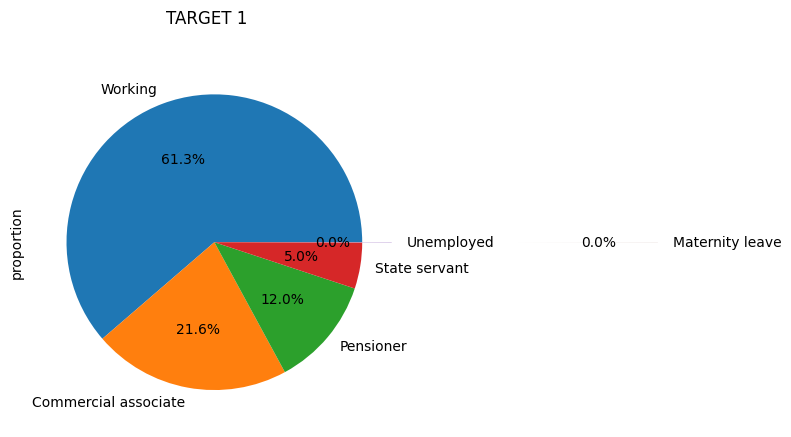

In [651]:
pie_chart_gender = df2_target1['NAME_INCOME_TYPE'].value_counts(normalize=True) * 100
explode=(0,0,0,0,0.2,2)
plot = pie_chart_gender.plot.pie(y=df2_target1['NAME_INCOME_TYPE'], autopct='%1.1f%%', subplots=True,title='TARGET 1', explode=explode)

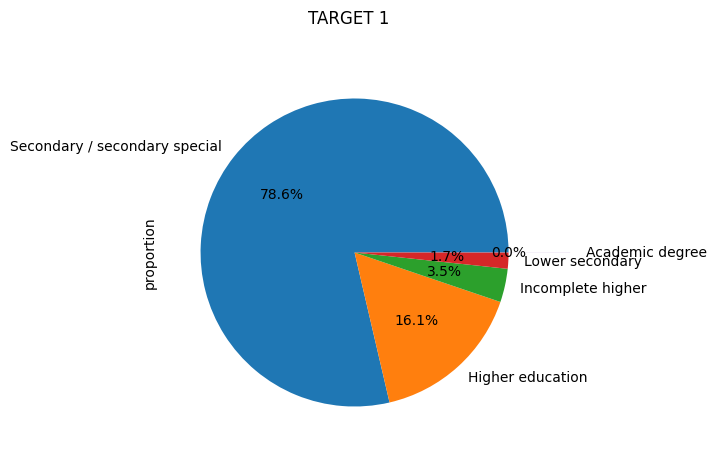

In [652]:
pie_chart_gender = df2_target1['NAME_EDUCATION_TYPE'].value_counts(normalize=True) * 100
explode= (0,0,0,0,0.4)
plot = pie_chart_gender.plot.pie(y=df2_target1['NAME_EDUCATION_TYPE'], figsize=(5, 5), autopct='%1.1f%%', subplots=True,title='TARGET 1',explode=explode)

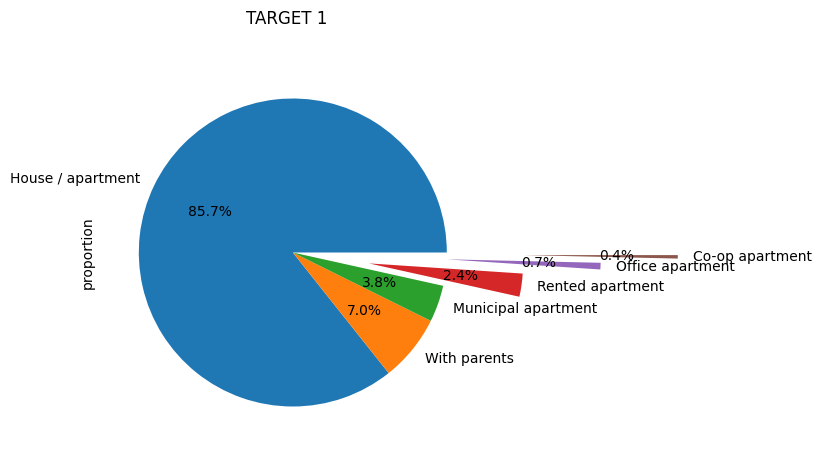

In [653]:
pie_chart_gender = df2_target1['NAME_HOUSING_TYPE'].value_counts(normalize=True) * 100
explode= (0,0,0,0.5,1.0,1.5)
plot = pie_chart_gender.plot.pie(y=df2_target1['NAME_HOUSING_TYPE'], figsize=(5, 5), autopct='%1.1f%%', subplots=True,title='TARGET 1',explode=explode)

<Axes: xlabel='NAME_INCOME_TYPE', ylabel='count'>

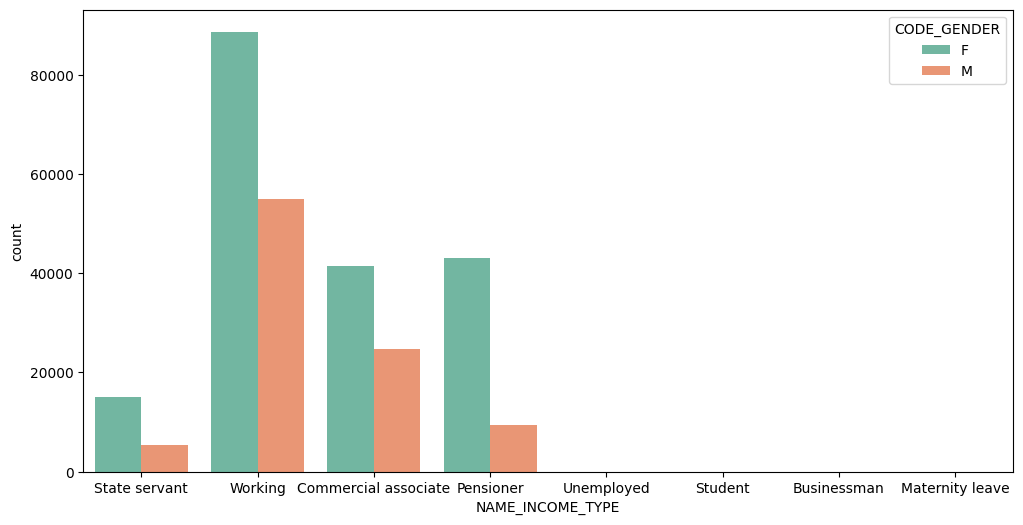

In [654]:
plt.figure(figsize=(12, 6))  

sns.countplot(x='NAME_INCOME_TYPE', hue='CODE_GENDER', data=df2_target0 , palette="Set2")



<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

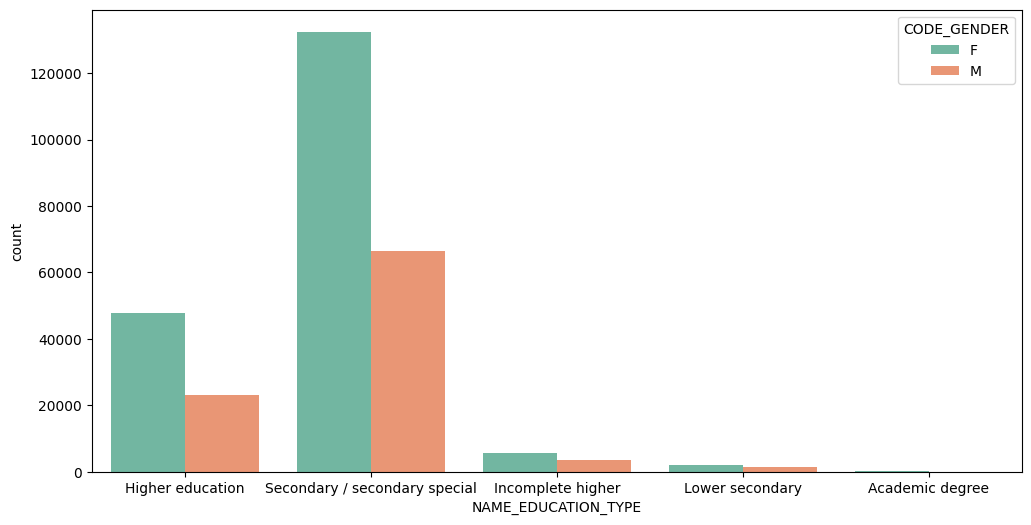

In [655]:
plt.figure(figsize=(12, 6))  

sns.countplot(x='NAME_EDUCATION_TYPE', hue='CODE_GENDER', data=df2_target0 , palette="Set2")

<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='count'>

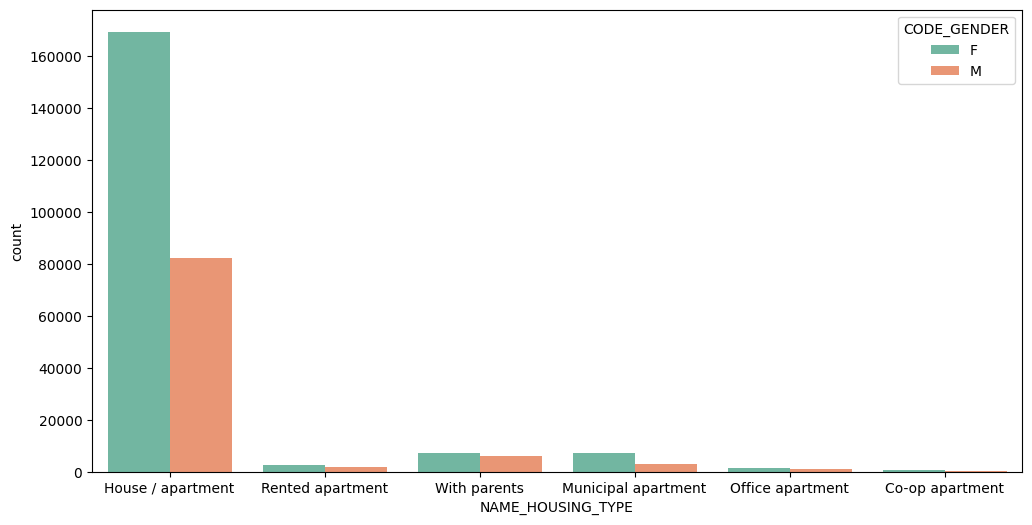

In [656]:
plt.figure(figsize=(12, 6))  

sns.countplot(x='NAME_HOUSING_TYPE', hue='CODE_GENDER', data=df2_target0 , palette="Set2")

<Axes: xlabel='NAME_INCOME_TYPE', ylabel='count'>

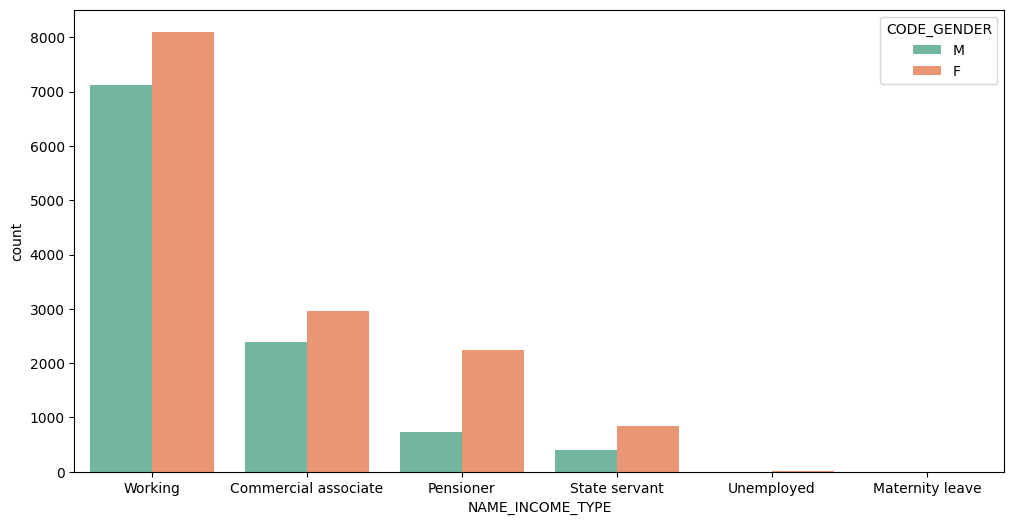

In [657]:
plt.figure(figsize=(12, 6))  

sns.countplot(x='NAME_INCOME_TYPE', hue='CODE_GENDER', data=df2_target1 , palette="Set2")

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

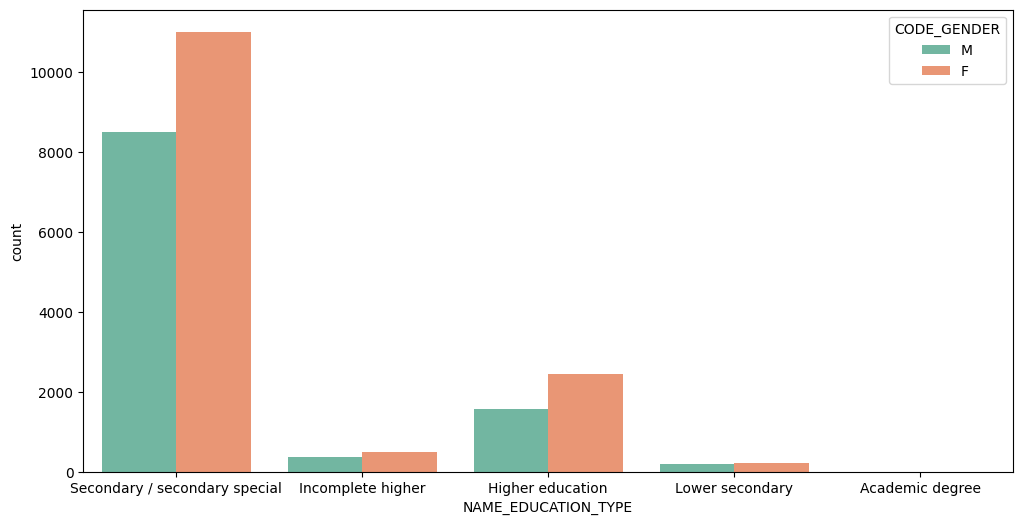

In [658]:
plt.figure(figsize=(12, 6))  

sns.countplot(x='NAME_EDUCATION_TYPE', hue='CODE_GENDER', data=df2_target1 , palette="Set2")

<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='count'>

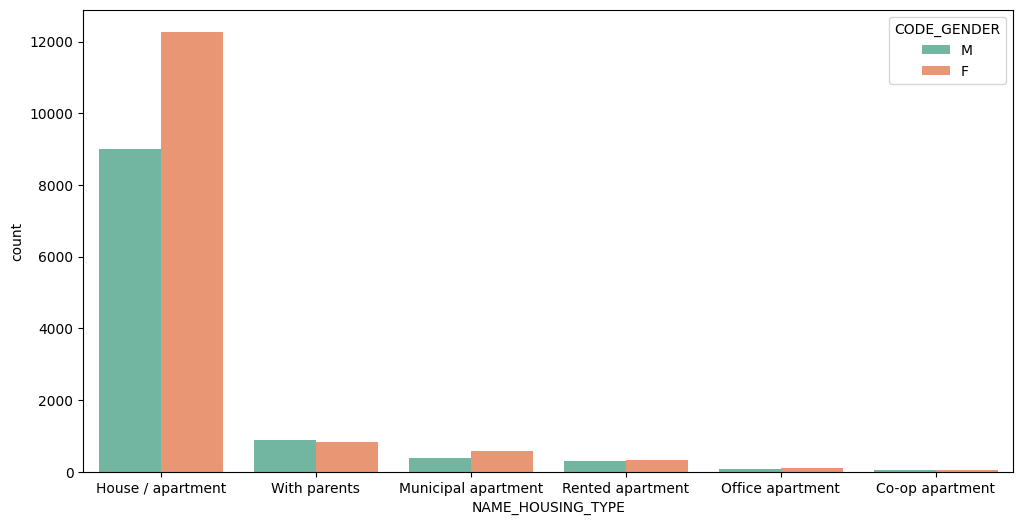

In [659]:
plt.figure(figsize=(12, 6))  

sns.countplot(x='NAME_HOUSING_TYPE', hue='CODE_GENDER', data=df2_target1 , palette="Set2")

<Axes: title={'center': 'TARGET0'}, xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

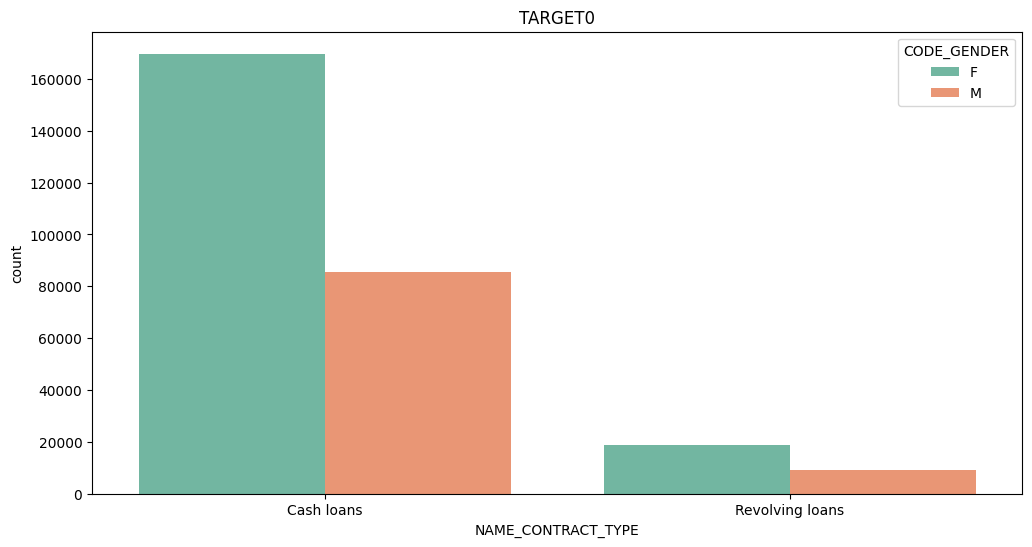

In [660]:
plt.figure(figsize=(12, 6))  

plt.title('TARGET0')
sns.countplot(x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', data=df2_target0 , palette="Set2")

<Axes: title={'center': 'TARGET 0'}, xlabel='AMT_INCOME_RANGE', ylabel='count'>

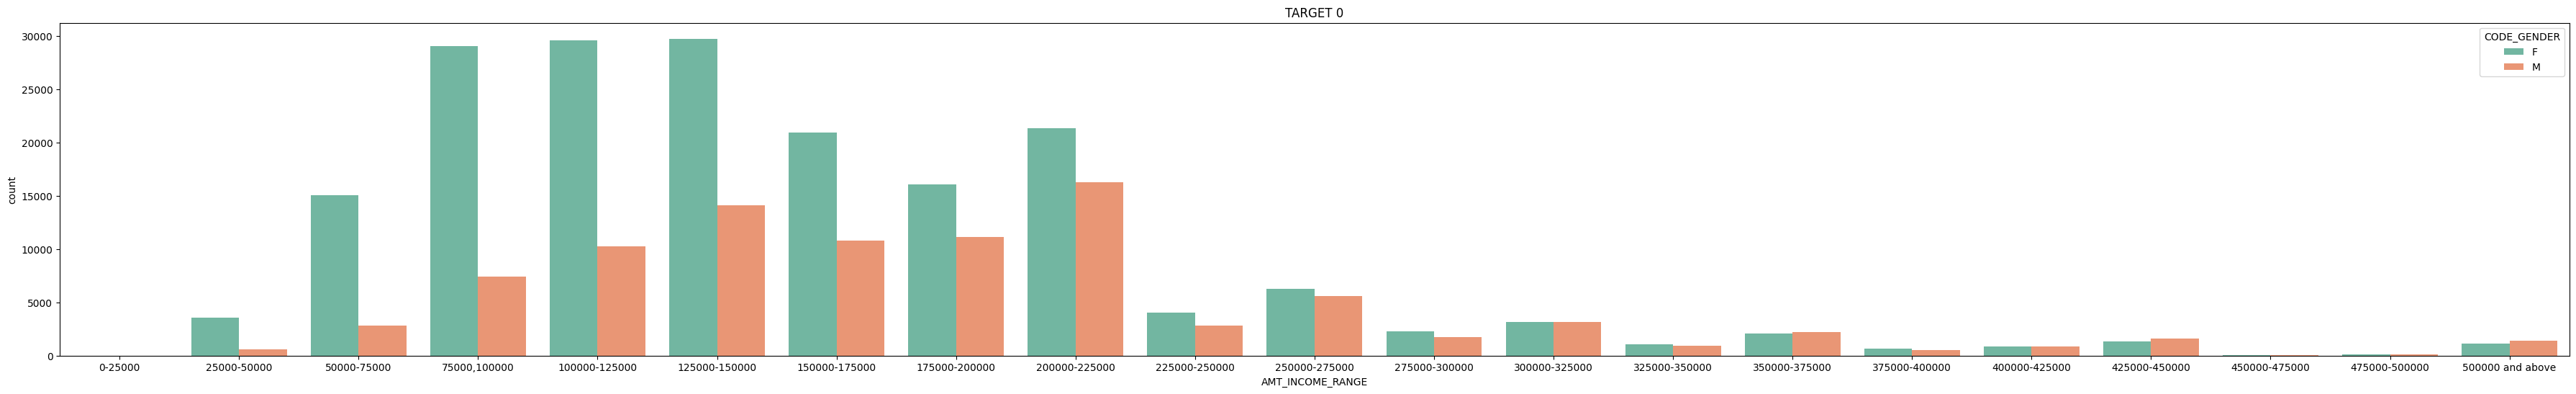

In [661]:
plt.figure(figsize=(45, 6))  
plt.title('TARGET 0')


sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=df2_target0 , palette="Set2")

<Axes: title={'center': 'TARGET 0'}, xlabel='AMT_CREDIT_RANGE', ylabel='count'>

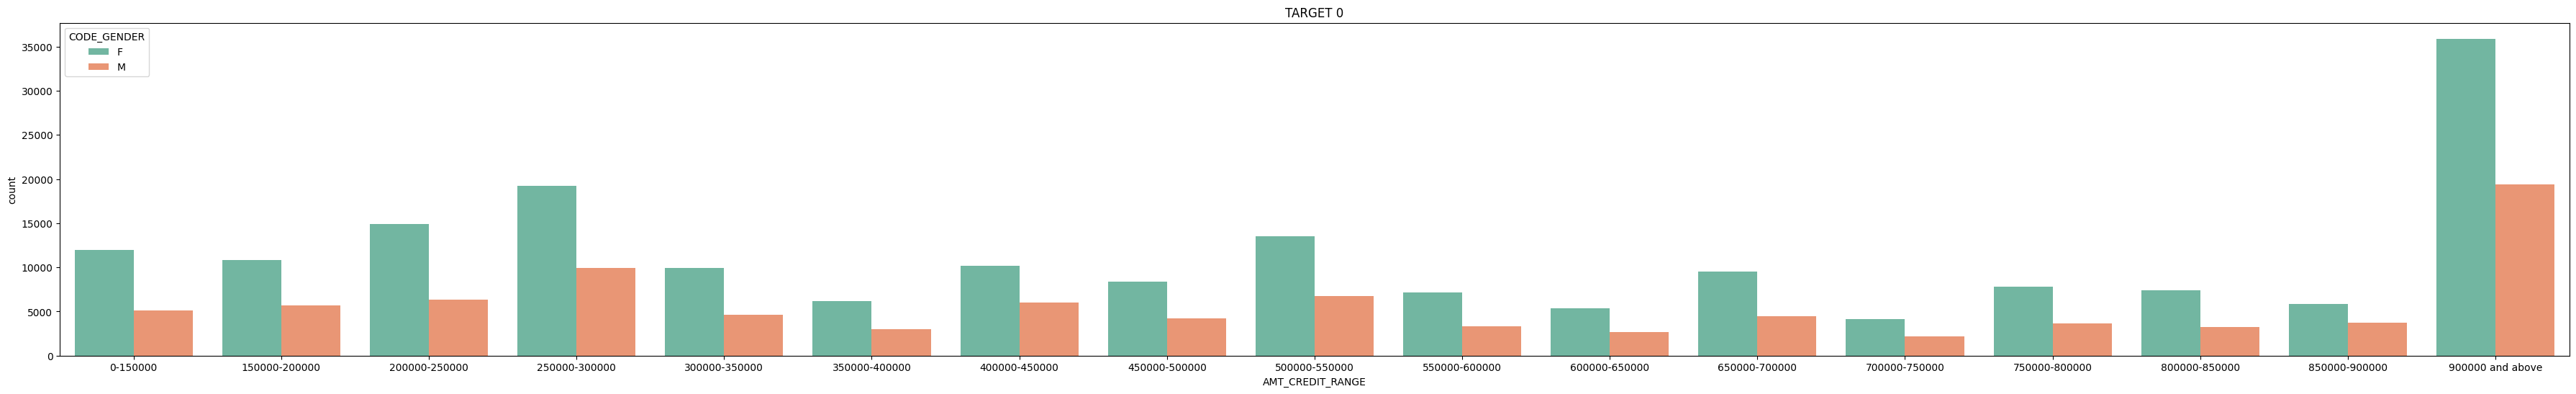

In [662]:
plt.figure(figsize=(45, 6))  
plt.title('TARGET 0')
sns.countplot(x='AMT_CREDIT_RANGE', hue='CODE_GENDER', data=df2_target0 ,palette="Set2")

<Axes: xlabel='AMT_ANNUITY_RANGE', ylabel='count'>

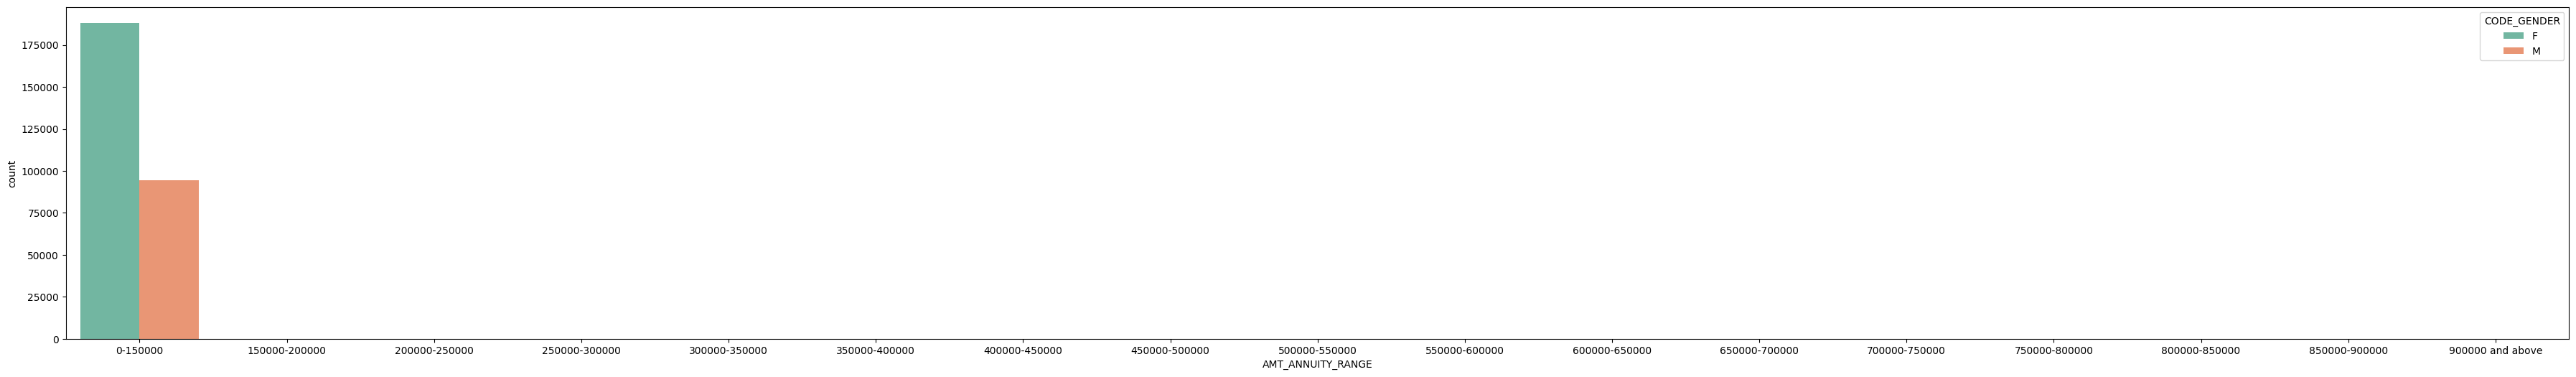

In [663]:
plt.figure(figsize=(45, 6))  

sns.countplot(x='AMT_ANNUITY_RANGE', hue='CODE_GENDER', data=df2_target0 , palette="Set2")

<Axes: title={'center': 'TARGET1'}, xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

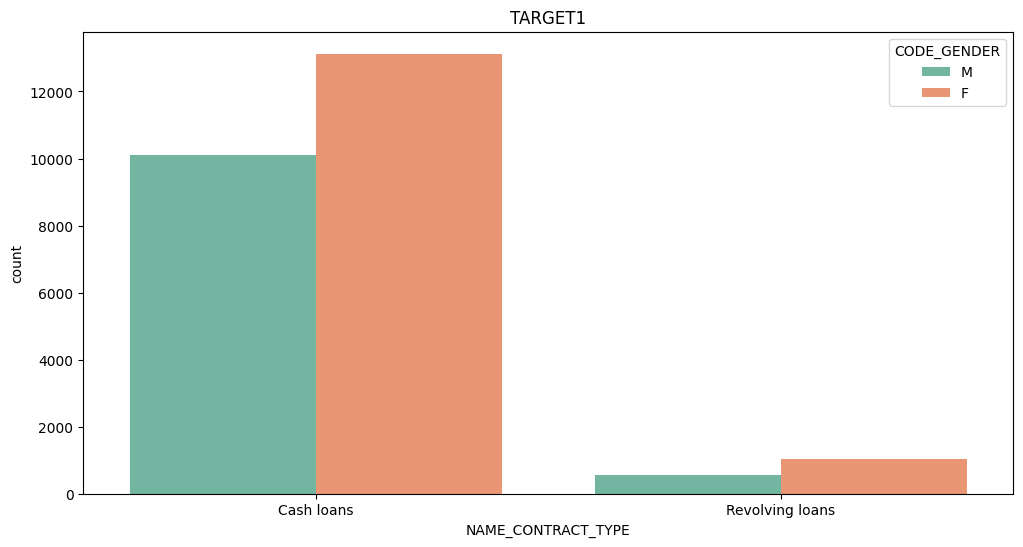

In [664]:
plt.figure(figsize=(12, 6))  
plt.title('TARGET1')

sns.countplot(x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', data=df2_target1 , palette="Set2")

<Axes: title={'center': 'TARGET 1'}, xlabel='AMT_INCOME_RANGE', ylabel='count'>

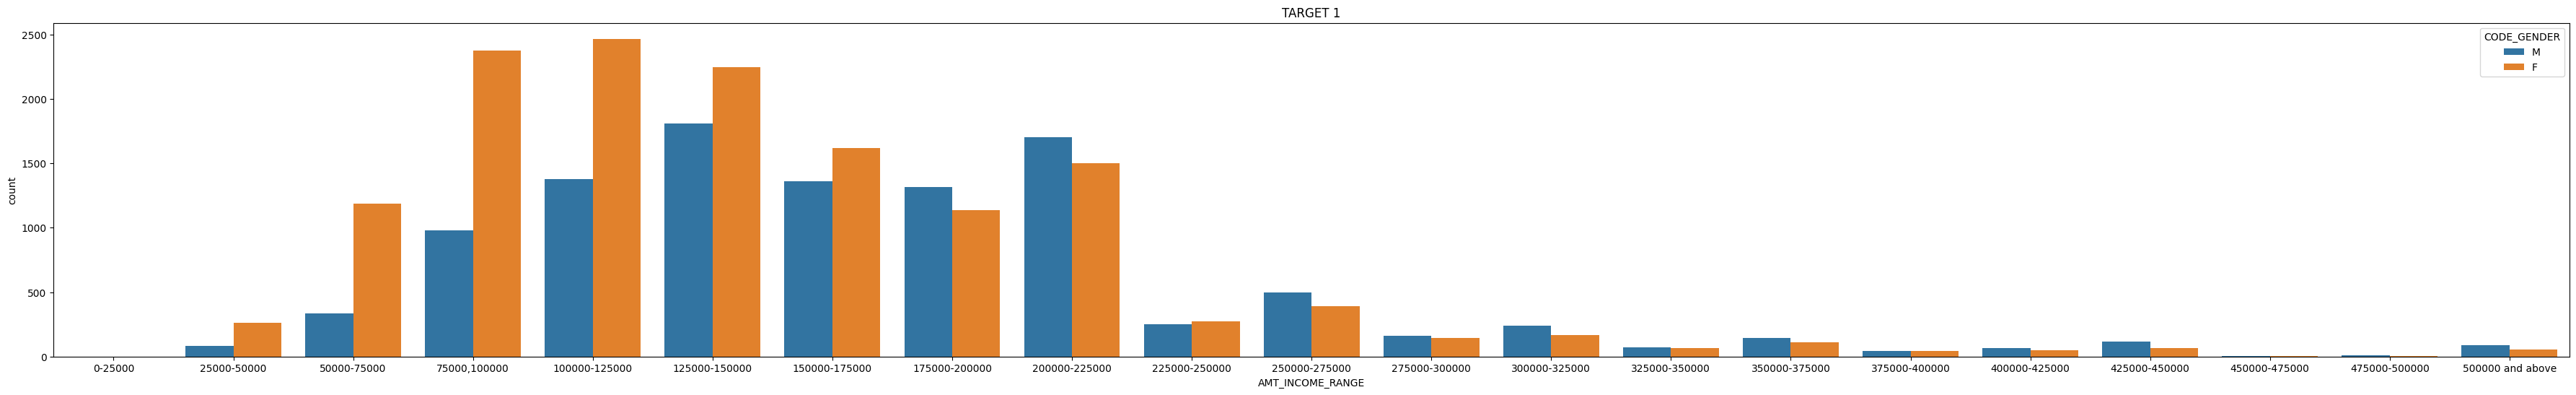

In [665]:
plt.figure(figsize=(45, 6))  
plt.title('TARGET 1')
sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=df2_target1 )

<Axes: title={'center': 'TARGET 1'}, xlabel='AMT_CREDIT_RANGE', ylabel='count'>

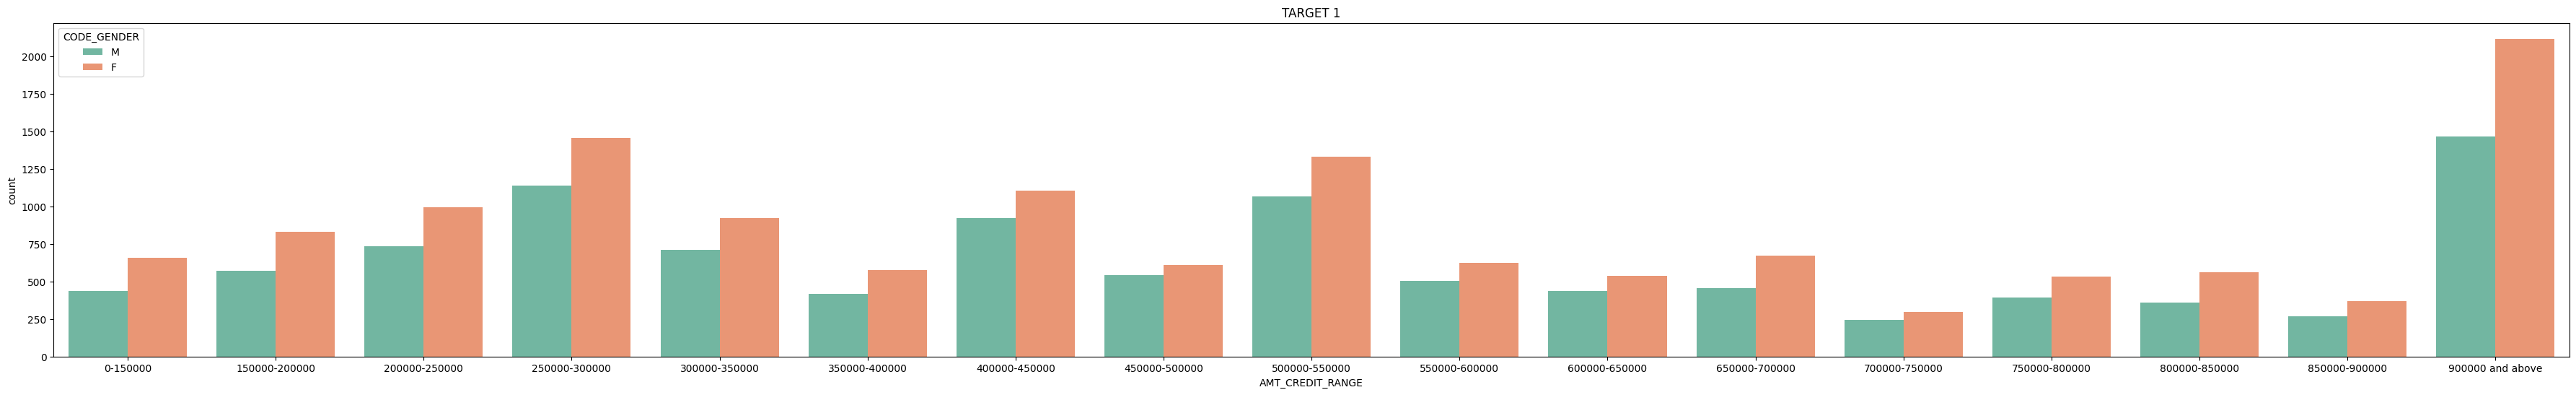

In [666]:
plt.figure(figsize=(45, 6))  
plt.title('TARGET 1')
sns.countplot(x='AMT_CREDIT_RANGE', hue='CODE_GENDER', data=df2_target1 , palette="Set2")

<Axes: xlabel='AMT_ANNUITY_RANGE', ylabel='count'>

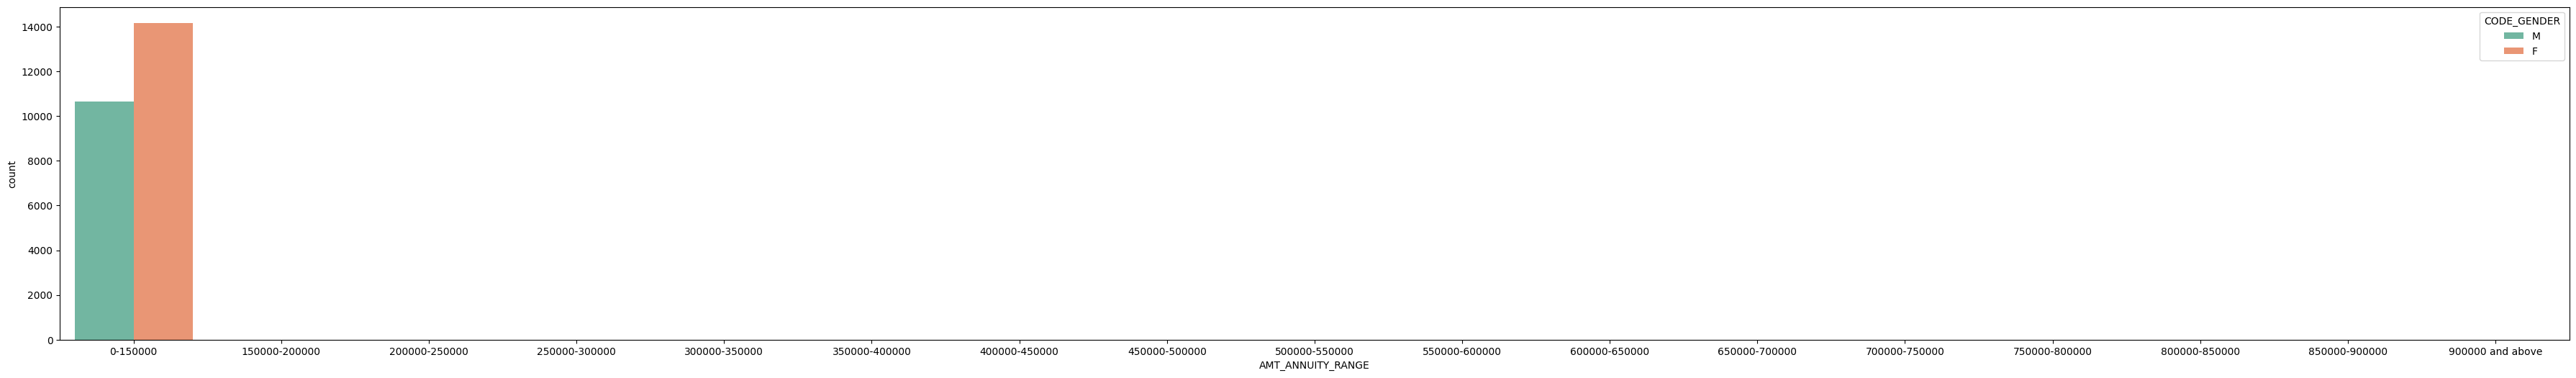

In [667]:
plt.figure(figsize=(45, 6))  

sns.countplot(x='AMT_ANNUITY_RANGE', hue='CODE_GENDER', data=df2_target1 , palette="Set2")

In [668]:
numers_0 = df2_target0.select_dtypes(include = {'float64','int64'})
numers_1 = df2_target1.select_dtypes(include = {'float64','int64'})

target0_corr=numers_0.iloc[0:,2:]
target1_corr=numers_1.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')


<Axes: title={'center': 'Corelation for Target 0'}>

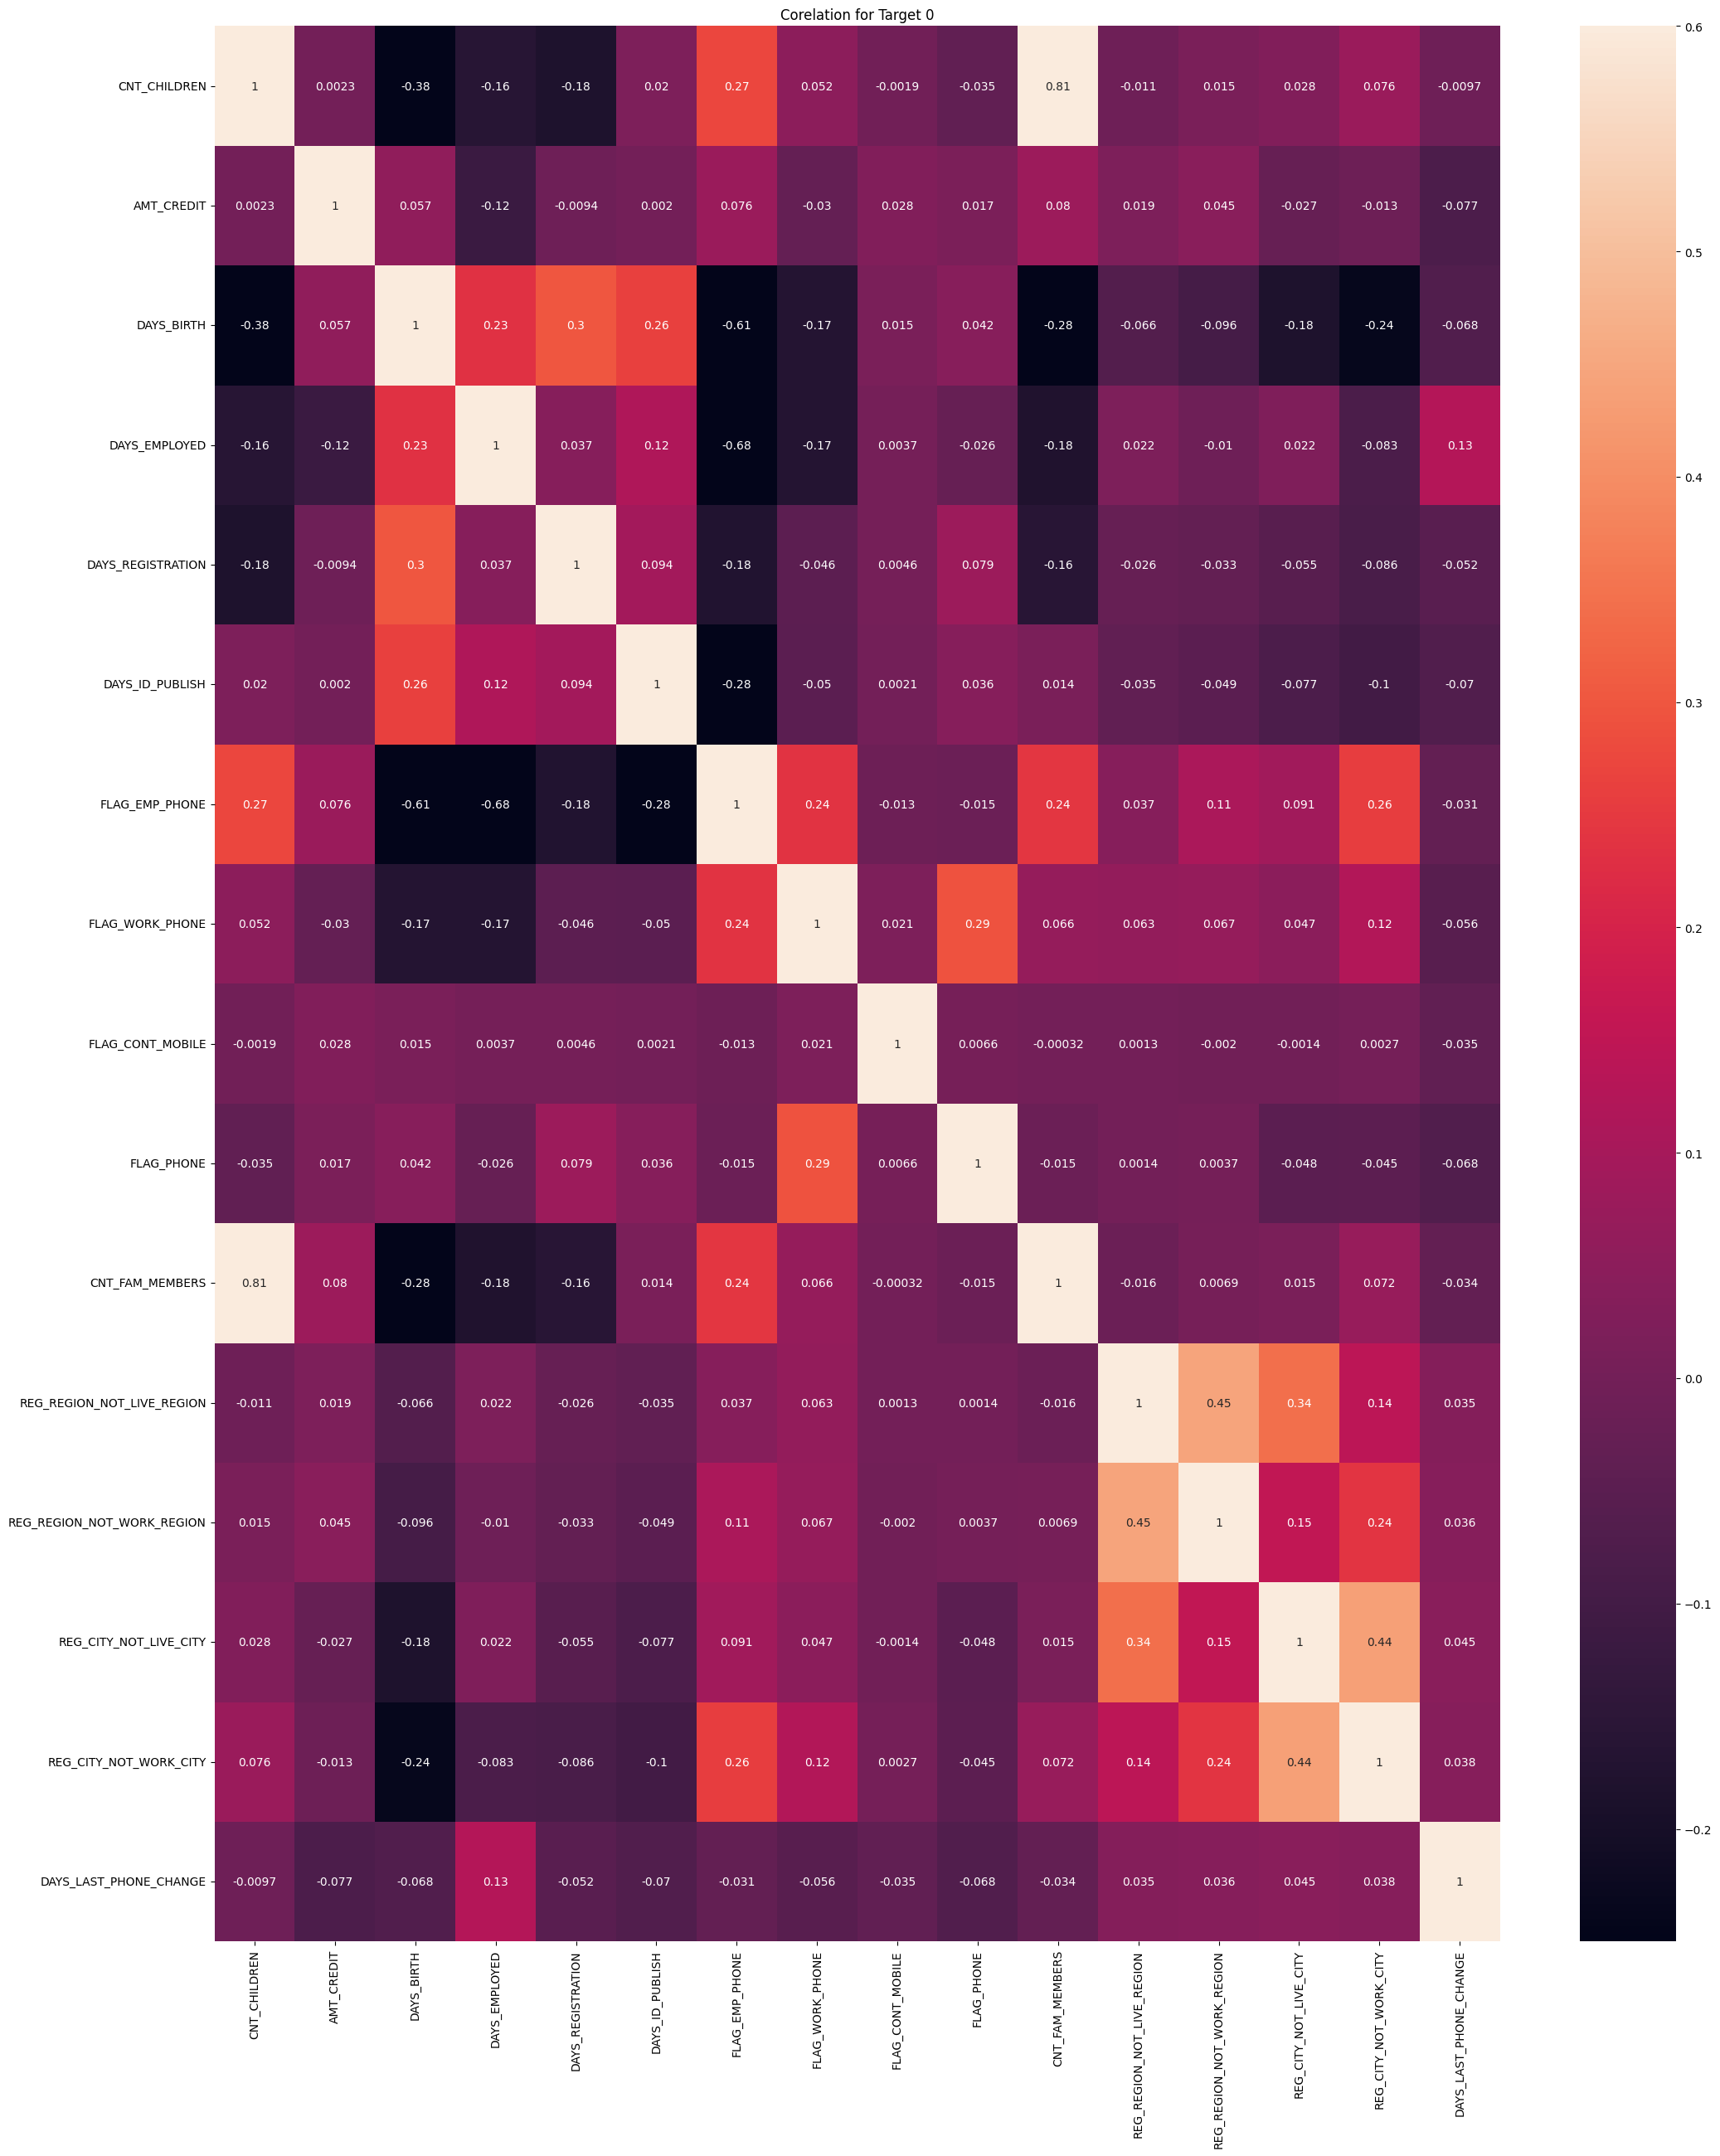

In [669]:
plt.figure(figsize=(25,30))
plt.title('Corelation for Target 0')
sns.heatmap(data=target0, vmin = -0.25, annot = True, vmax = 0.6)


<Axes: title={'center': 'Corelation for Target 1'}>

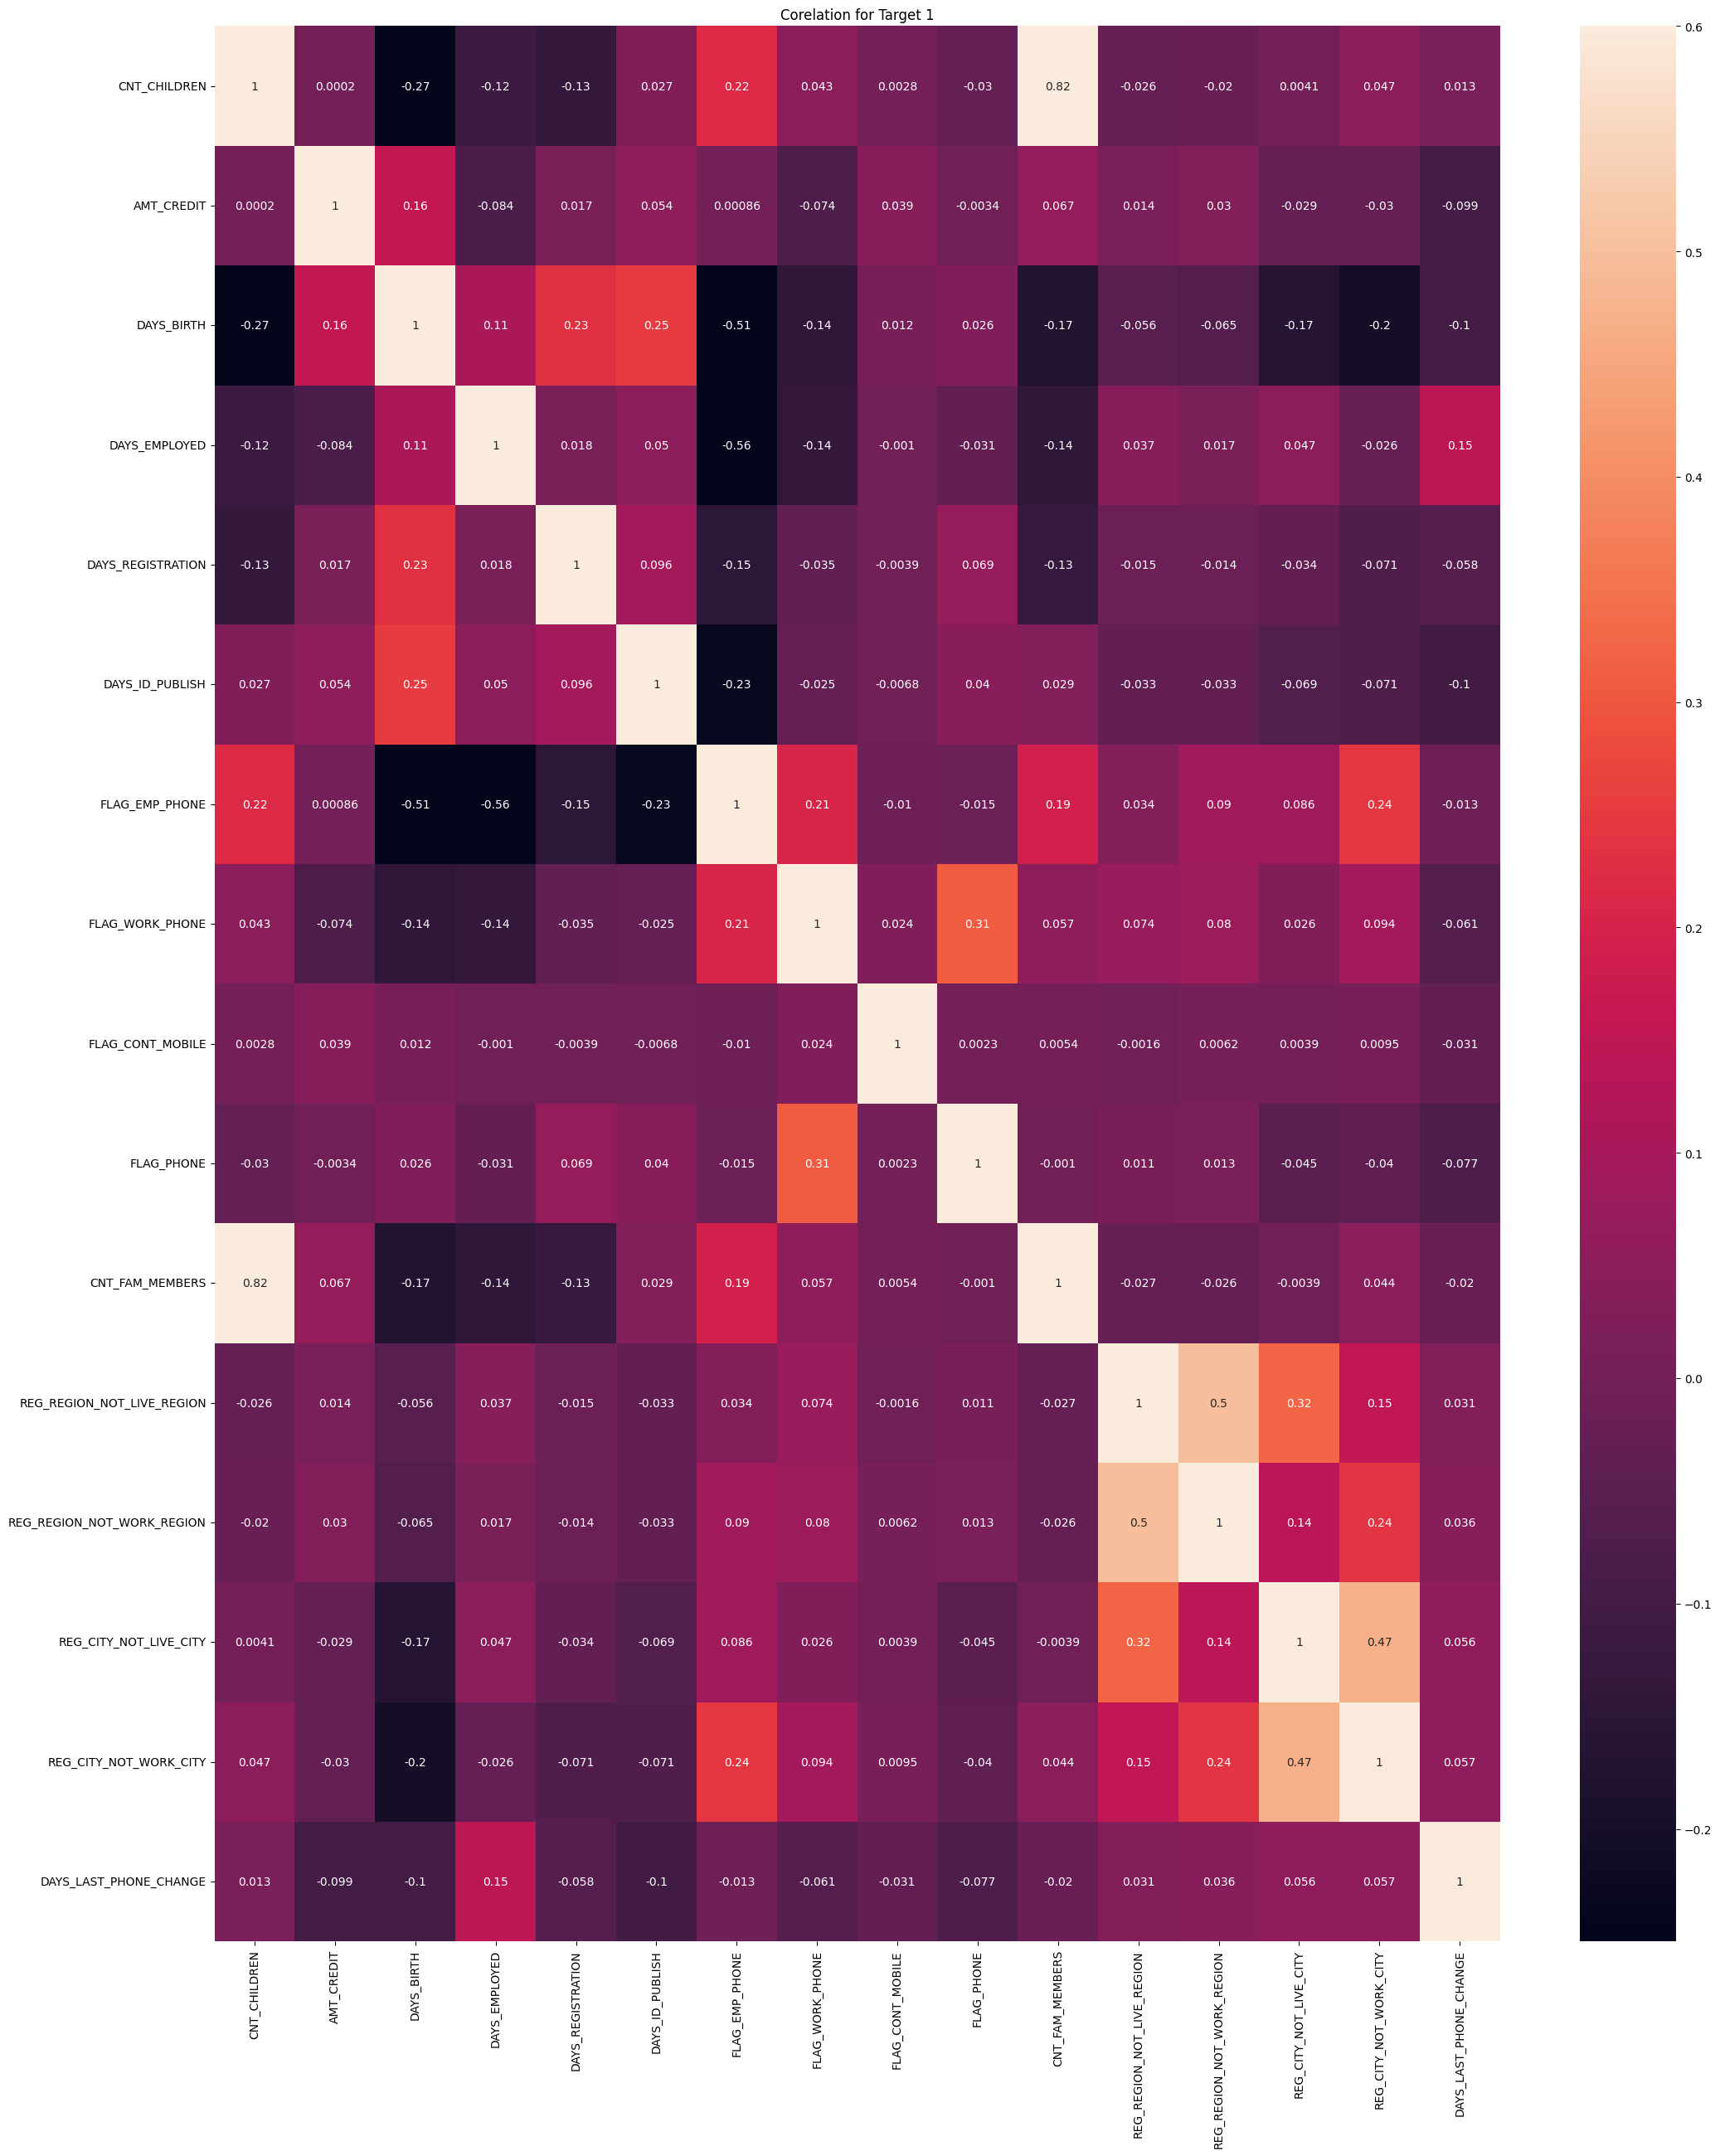

In [670]:
plt.figure(figsize=(25,30))
plt.title('Corelation for Target 1')
sns.heatmap(data=target1, vmin = -0.25, annot = True, vmax = 0.6)

BIVARIATE ANALYSIS


In [671]:
df2_target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE
0,100002,1,Cash loans,M,Y,0,406597.500,Working,Secondary / secondary special,Single / not married,...,WEDNESDAY,0,0,0,0,Business Entity Type 3,-1134.000,200000-225000,400000-450000,0-150000
26,100031,1,Cash loans,F,Y,0,979992.000,Working,Secondary / secondary special,Widow,...,MONDAY,0,0,0,0,Business Entity Type 3,-161.000,100000-125000,900000 and above,0-150000
40,100047,1,Cash loans,M,Y,0,1193580.000,Commercial associate,Secondary / secondary special,Married,...,TUESDAY,0,0,0,0,Business Entity Type 3,-1075.000,200000-225000,900000 and above,0-150000
42,100049,1,Cash loans,F,N,0,288873.000,Working,Secondary / secondary special,Civil marriage,...,THURSDAY,0,0,0,0,Self-employed,-1480.000,125000-150000,250000-300000,0-150000
81,100096,1,Cash loans,F,Y,0,252000.000,Pensioner,Secondary / secondary special,Married,...,THURSDAY,0,0,0,0,XNA,0.000,"75000,100000",250000-300000,0-150000


C:\Users\suman\AppData\Local\Temp\ipykernel_19552\3838090443.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2_target0,y='ORGANIZATION_TYPE',order=df2_target0['ORGANIZATION_TYPE'].value_counts().index,palette='hot')


<Axes: xlabel='count', ylabel='ORGANIZATION_TYPE'>

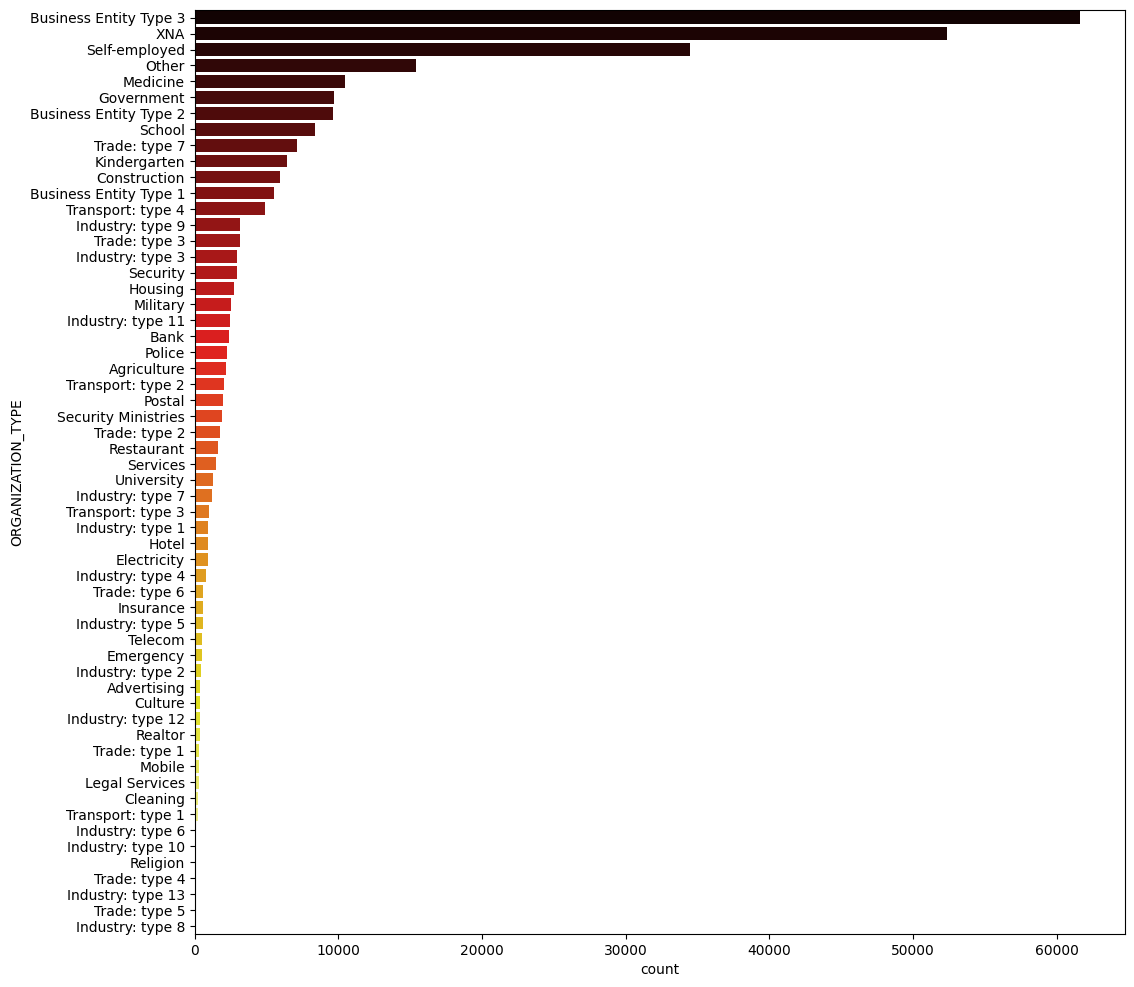

In [672]:
plt.figure(figsize=(12,12))
sns.countplot(data=df2_target0,y='ORGANIZATION_TYPE',order=df2_target0['ORGANIZATION_TYPE'].value_counts().index,palette='hot')


C:\Users\suman\AppData\Local\Temp\ipykernel_19552\2599271123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df2_target1,y='ORGANIZATION_TYPE',order=df2_target1['ORGANIZATION_TYPE'].value_counts().index,palette='hot')


<Axes: xlabel='count', ylabel='ORGANIZATION_TYPE'>

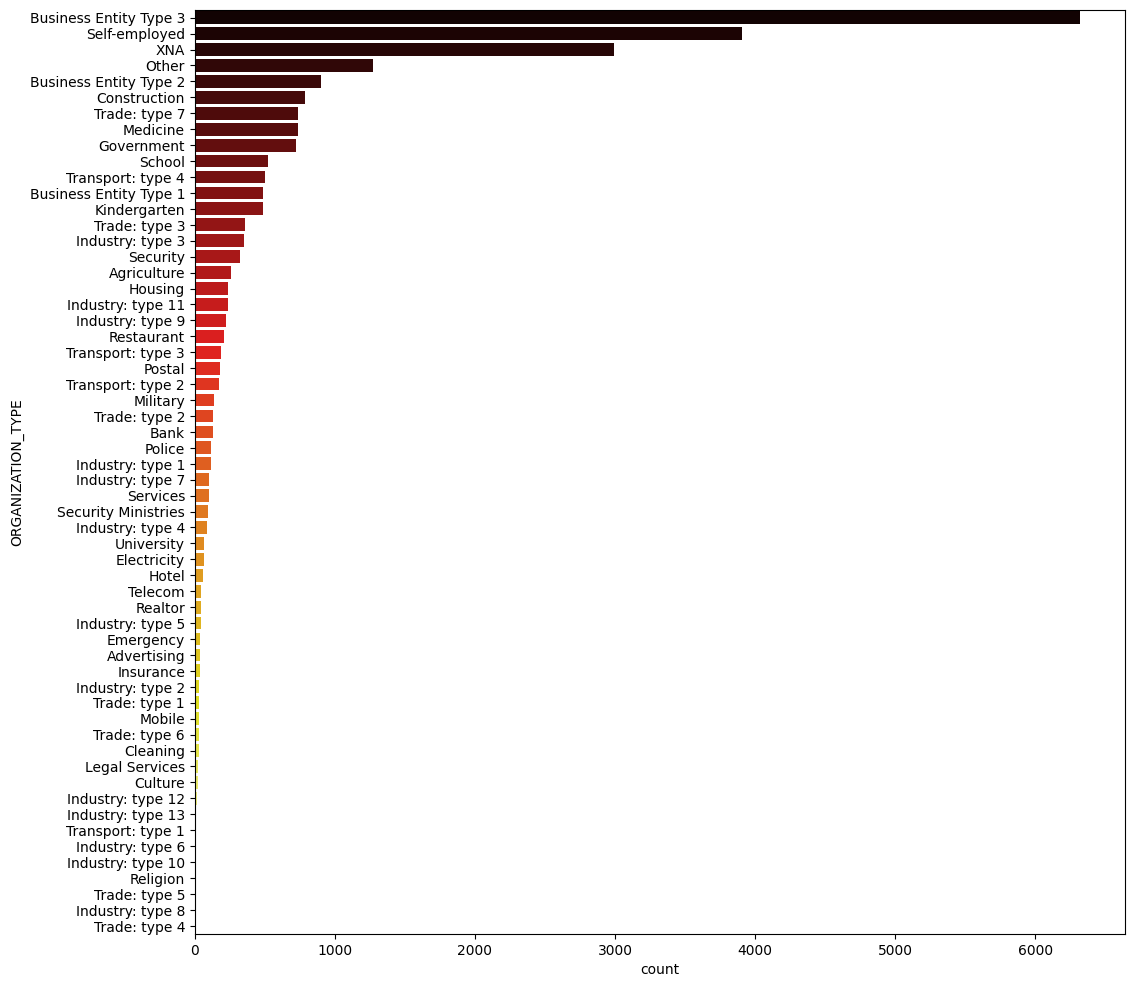

In [673]:
plt.figure(figsize=(12,12))
sns.countplot(data=df2_target1,y='ORGANIZATION_TYPE',order=df2_target1['ORGANIZATION_TYPE'].value_counts().index,palette='hot')

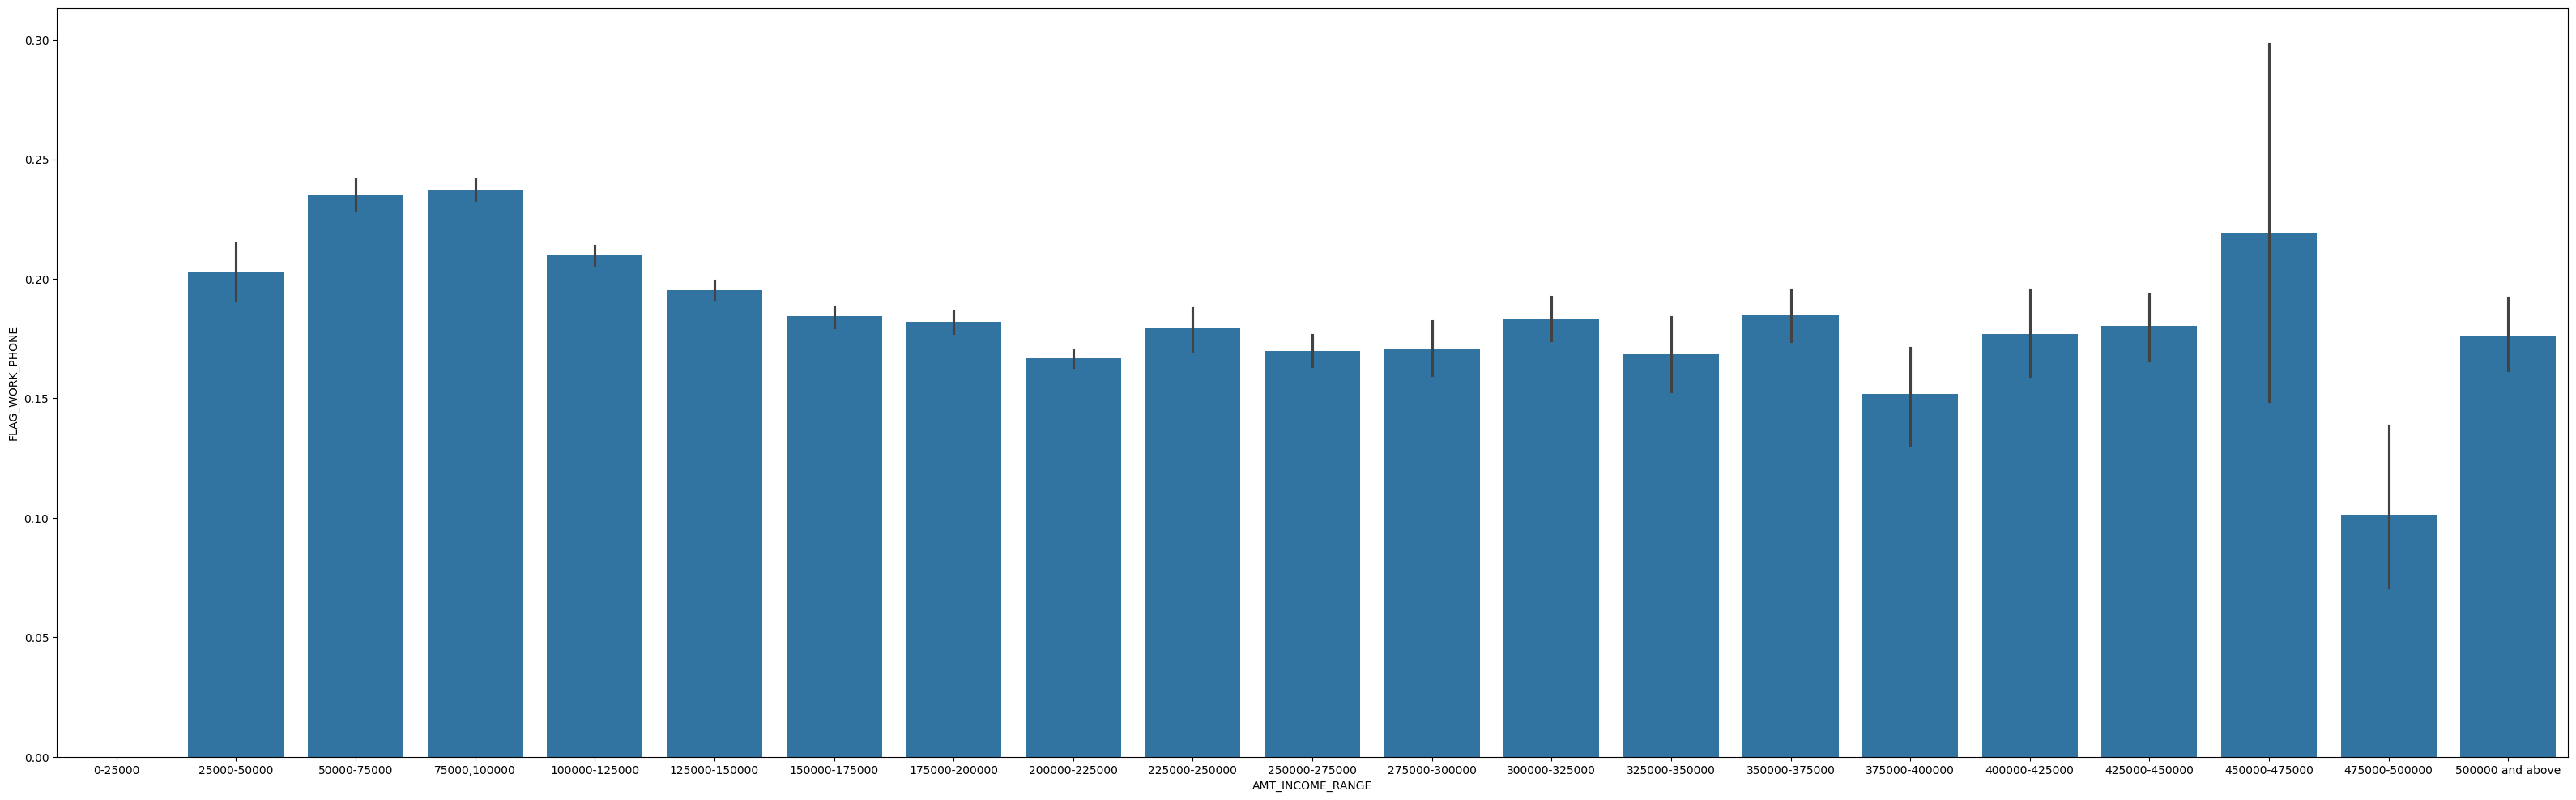

In [674]:
f, ax = plt.subplots(figsize=(40,12))
plot_1=sns.barplot(x="AMT_INCOME_RANGE",y="FLAG_WORK_PHONE",data=df2_target0)

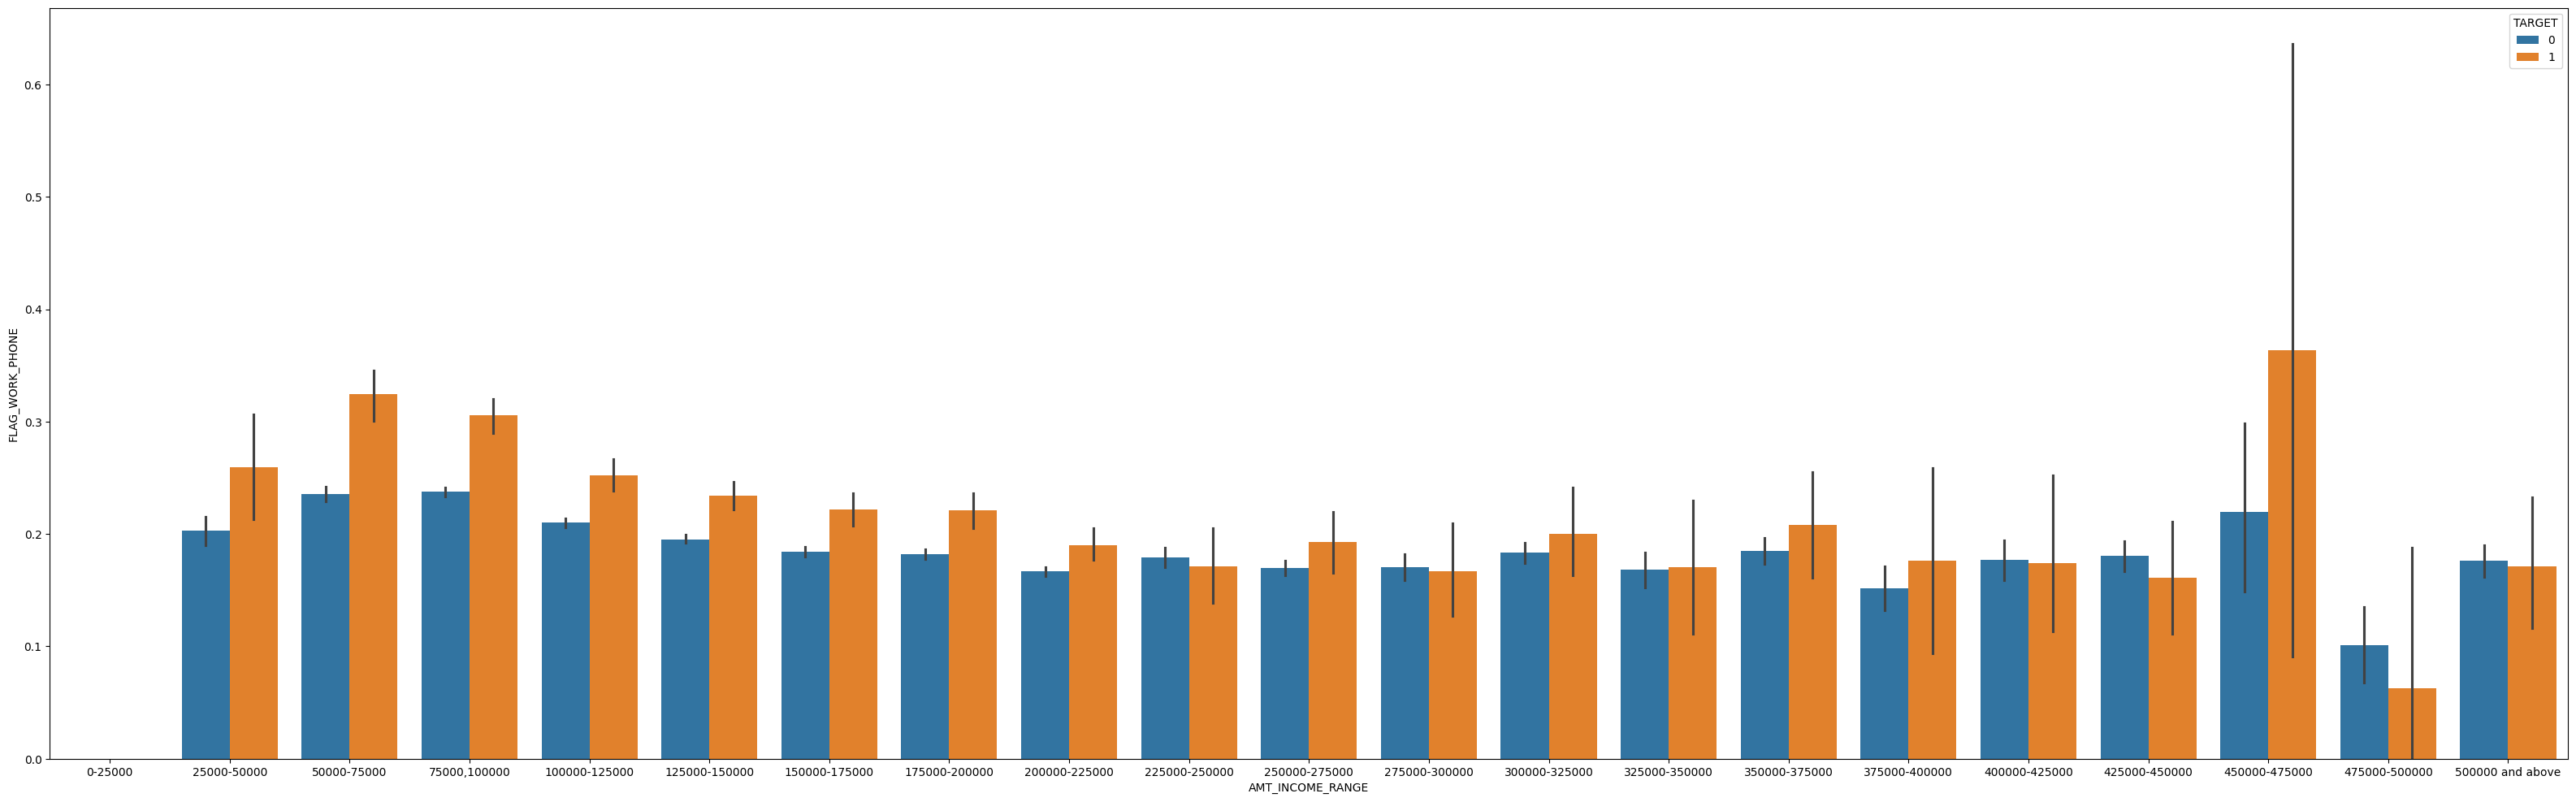

In [675]:
f, ax = plt.subplots(figsize=(40,12))
plot_1=sns.barplot(x="AMT_INCOME_RANGE",y="FLAG_WORK_PHONE",data=df2,hue="TARGET")

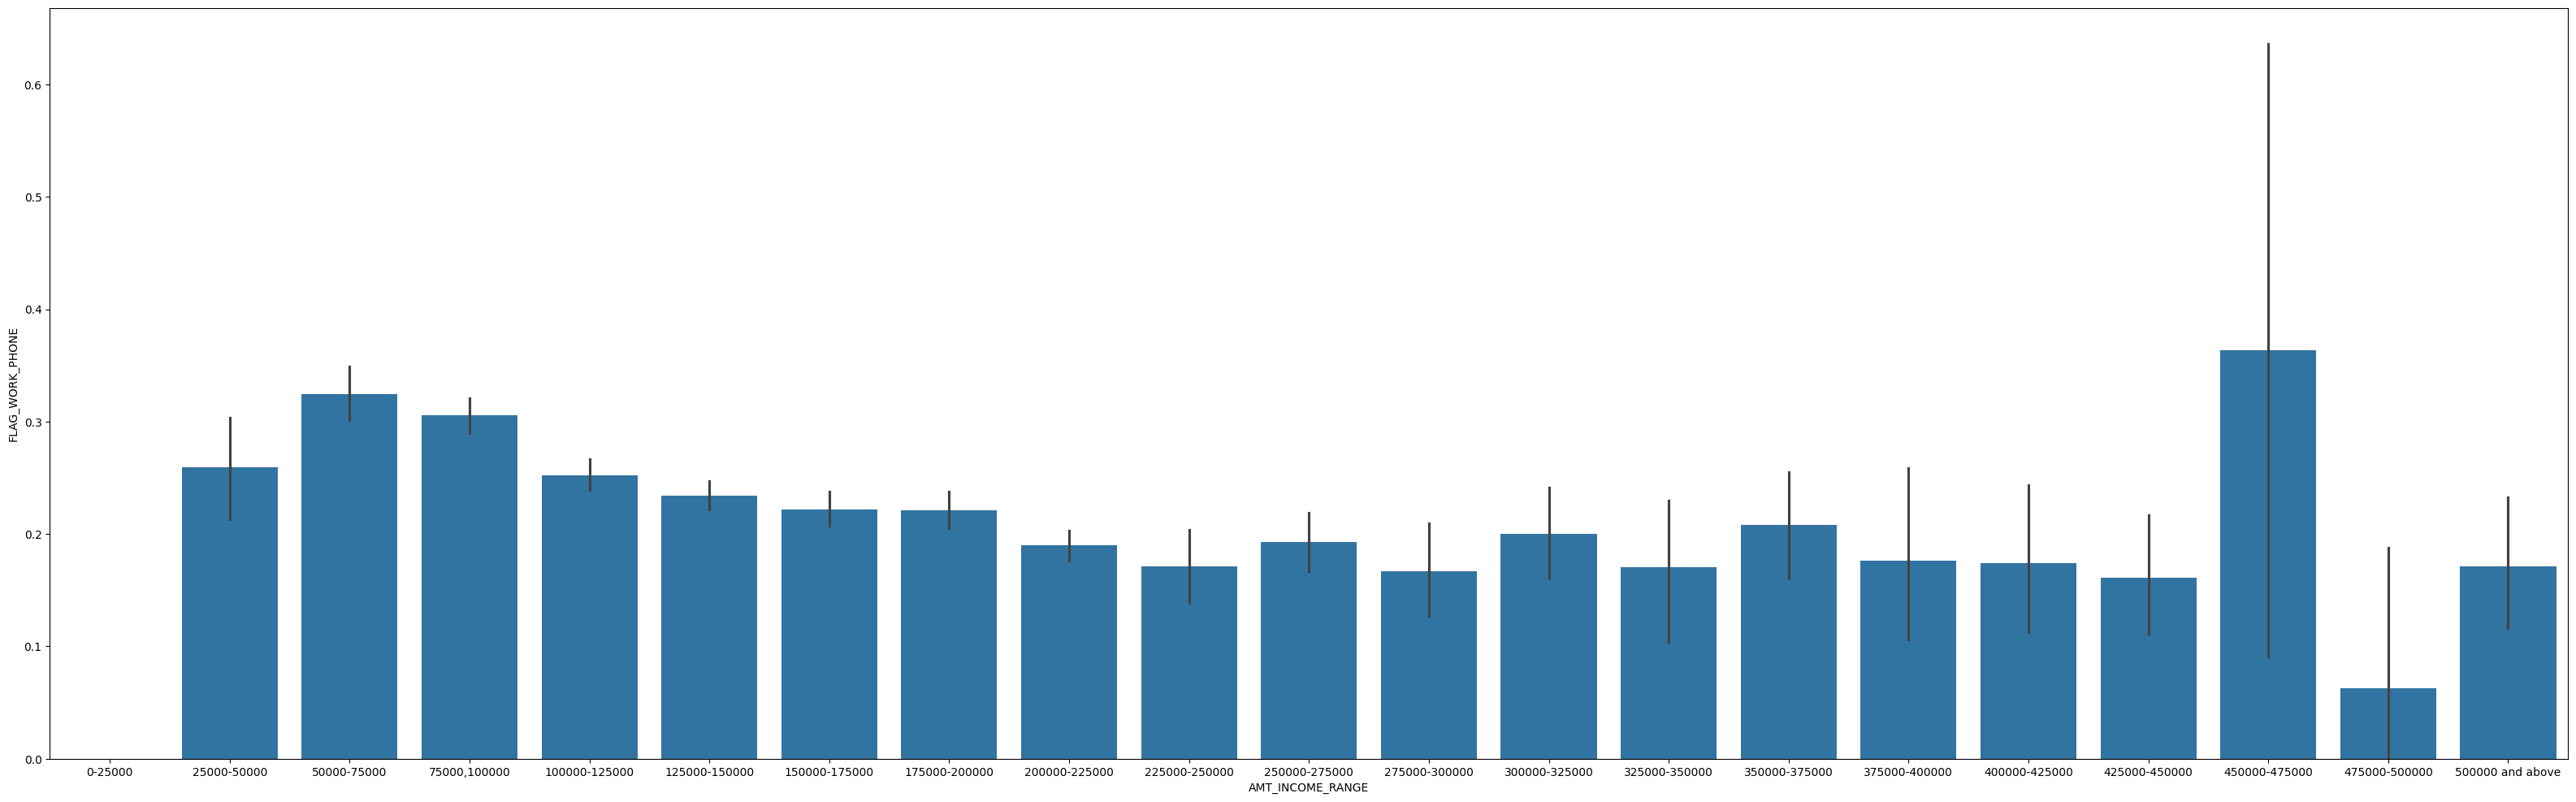

In [676]:
f, ax = plt.subplots(figsize=(40,12))
plot_1=sns.barplot(x="AMT_INCOME_RANGE",y="FLAG_WORK_PHONE",data=df2_target1)

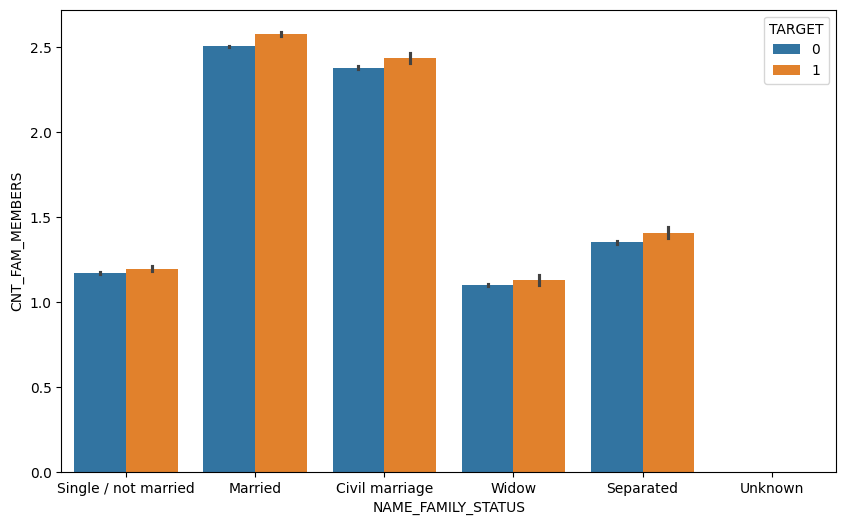

In [677]:
plt.figure(figsize=(10,6))
plot_1=sns.barplot(x="NAME_FAMILY_STATUS",y="CNT_FAM_MEMBERS",data=df2,hue="TARGET")


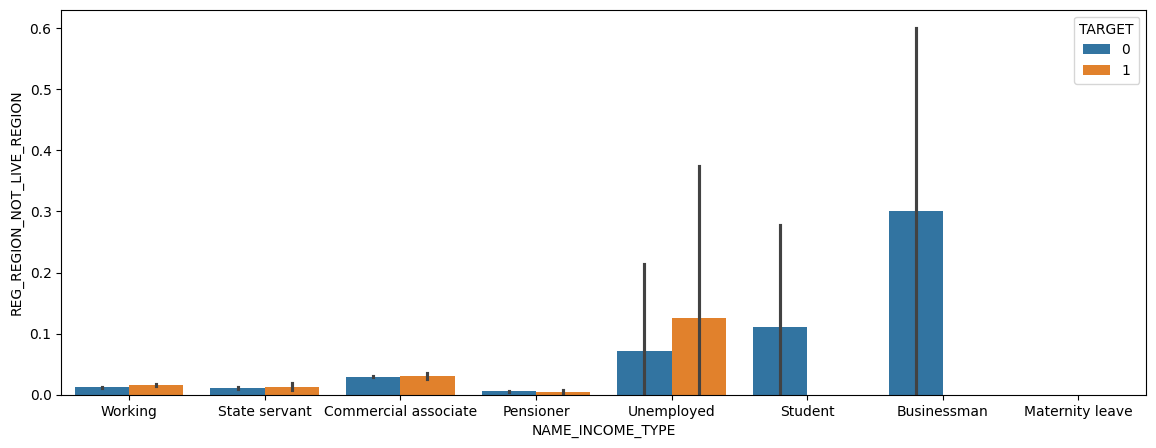

In [678]:
plt.figure(figsize=(14,5))
plot_1=sns.barplot(x="NAME_INCOME_TYPE",y="REG_REGION_NOT_LIVE_REGION",data=df2,hue="TARGET")


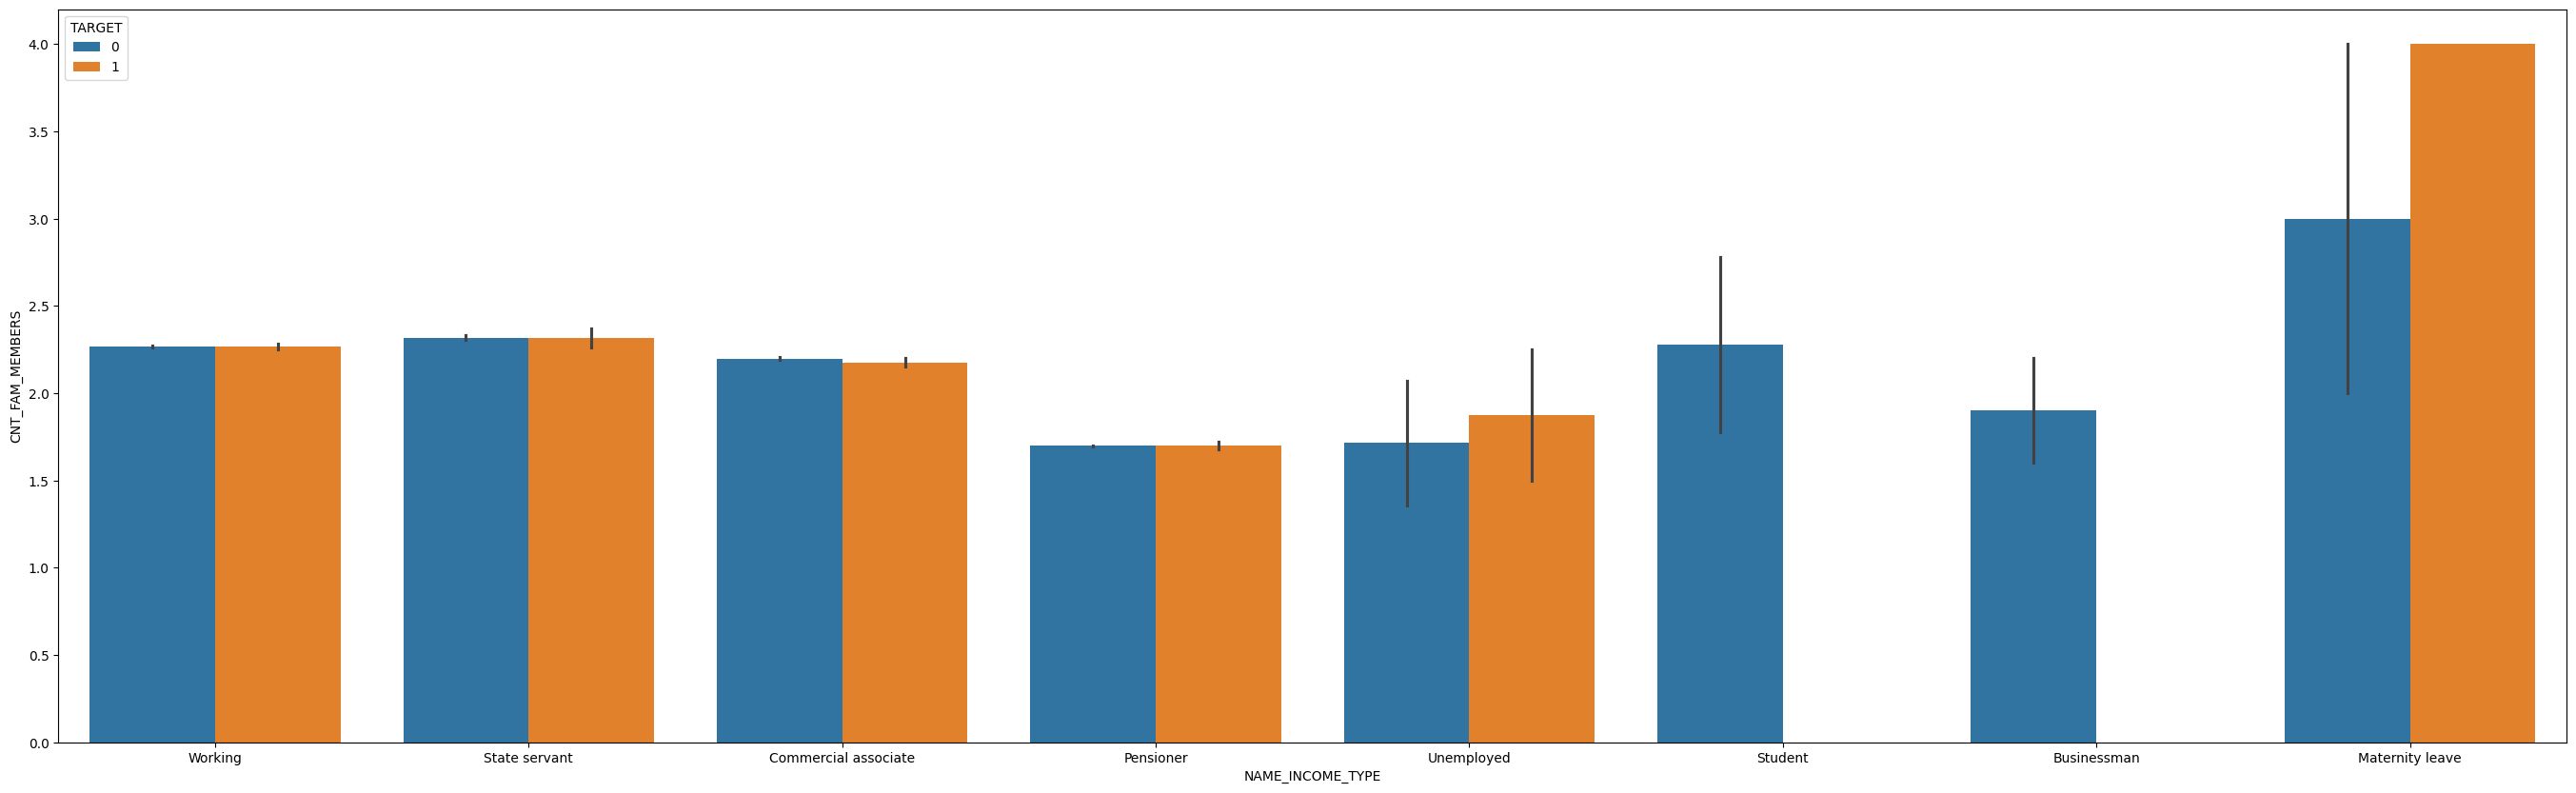

In [679]:
plt.figure(figsize=(34,10))
plot_1=sns.barplot(x="NAME_INCOME_TYPE",y="CNT_FAM_MEMBERS",data=df2,hue="TARGET")

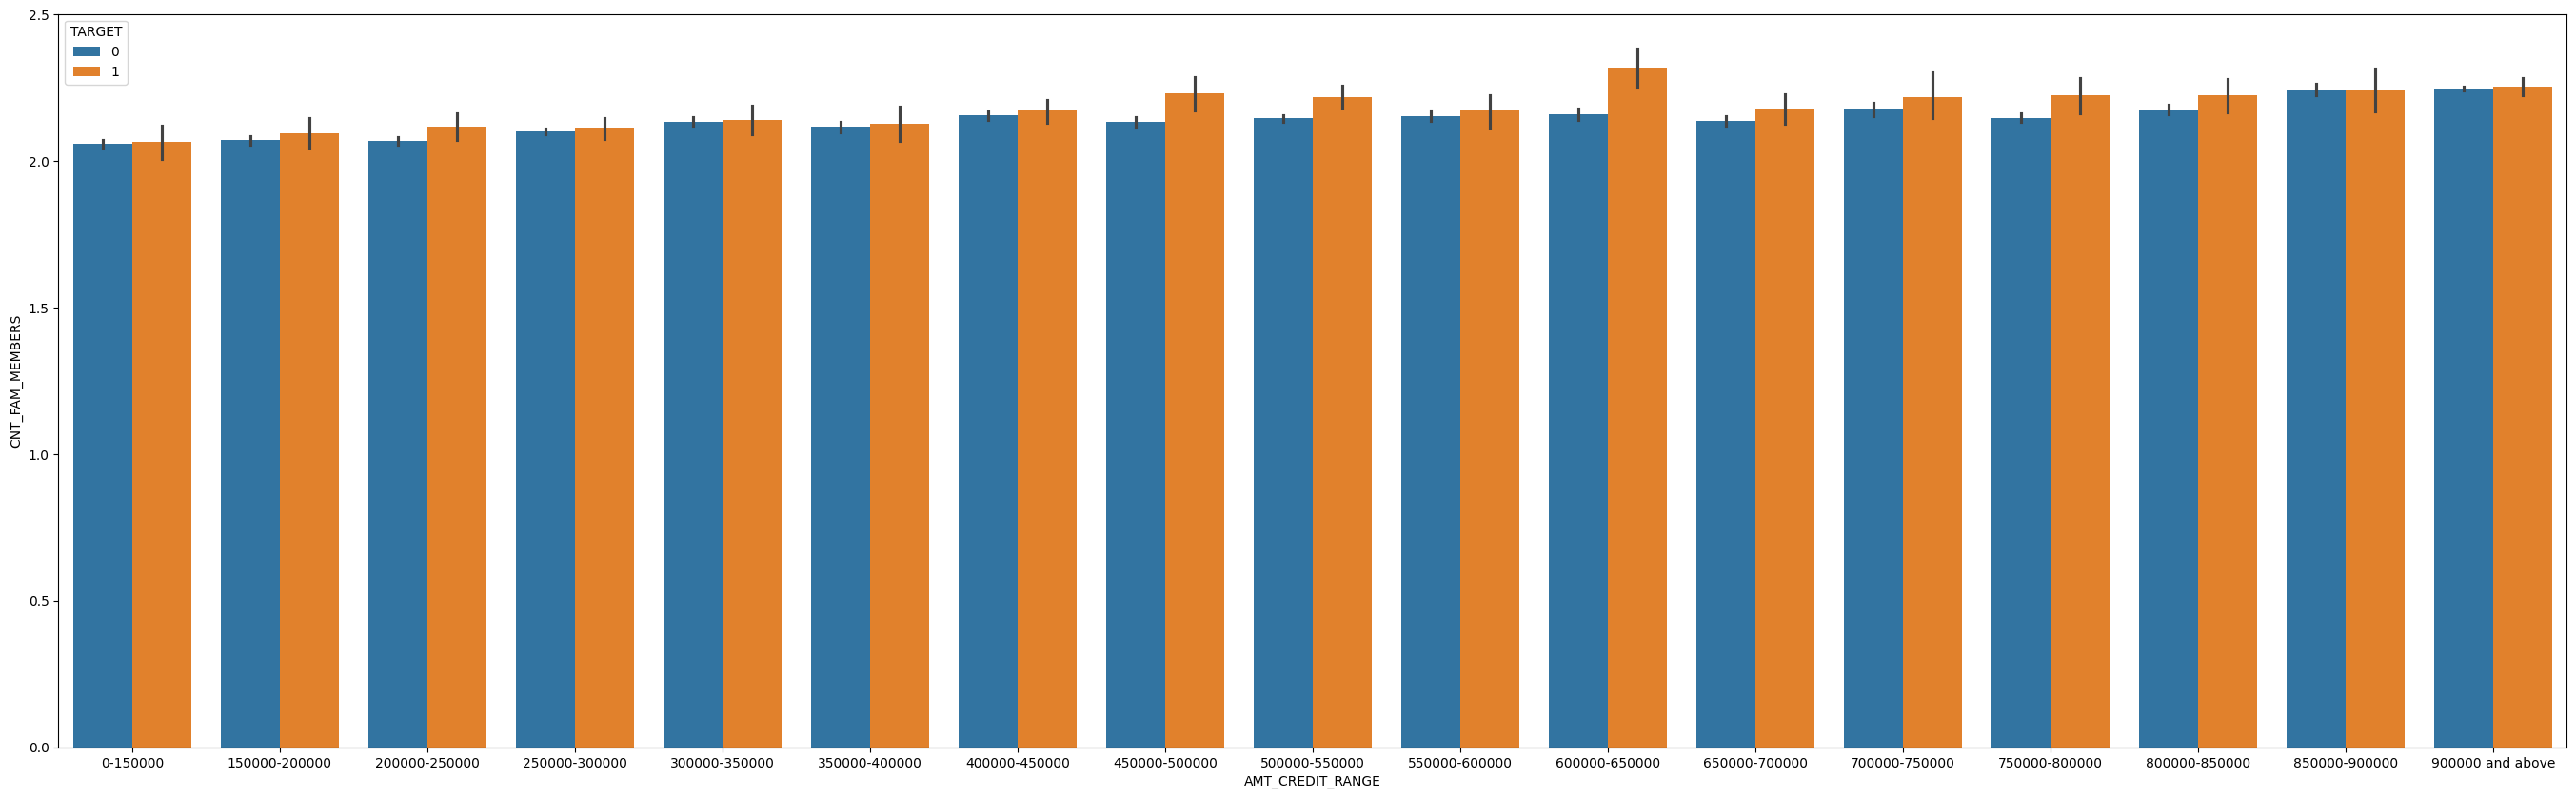

In [680]:
plt.figure(figsize=(34,10))
plot_1=sns.barplot(x="AMT_CREDIT_RANGE",y="CNT_FAM_MEMBERS",data=df2,hue="TARGET")

0-6.5 lakh with more family members become defaulters.

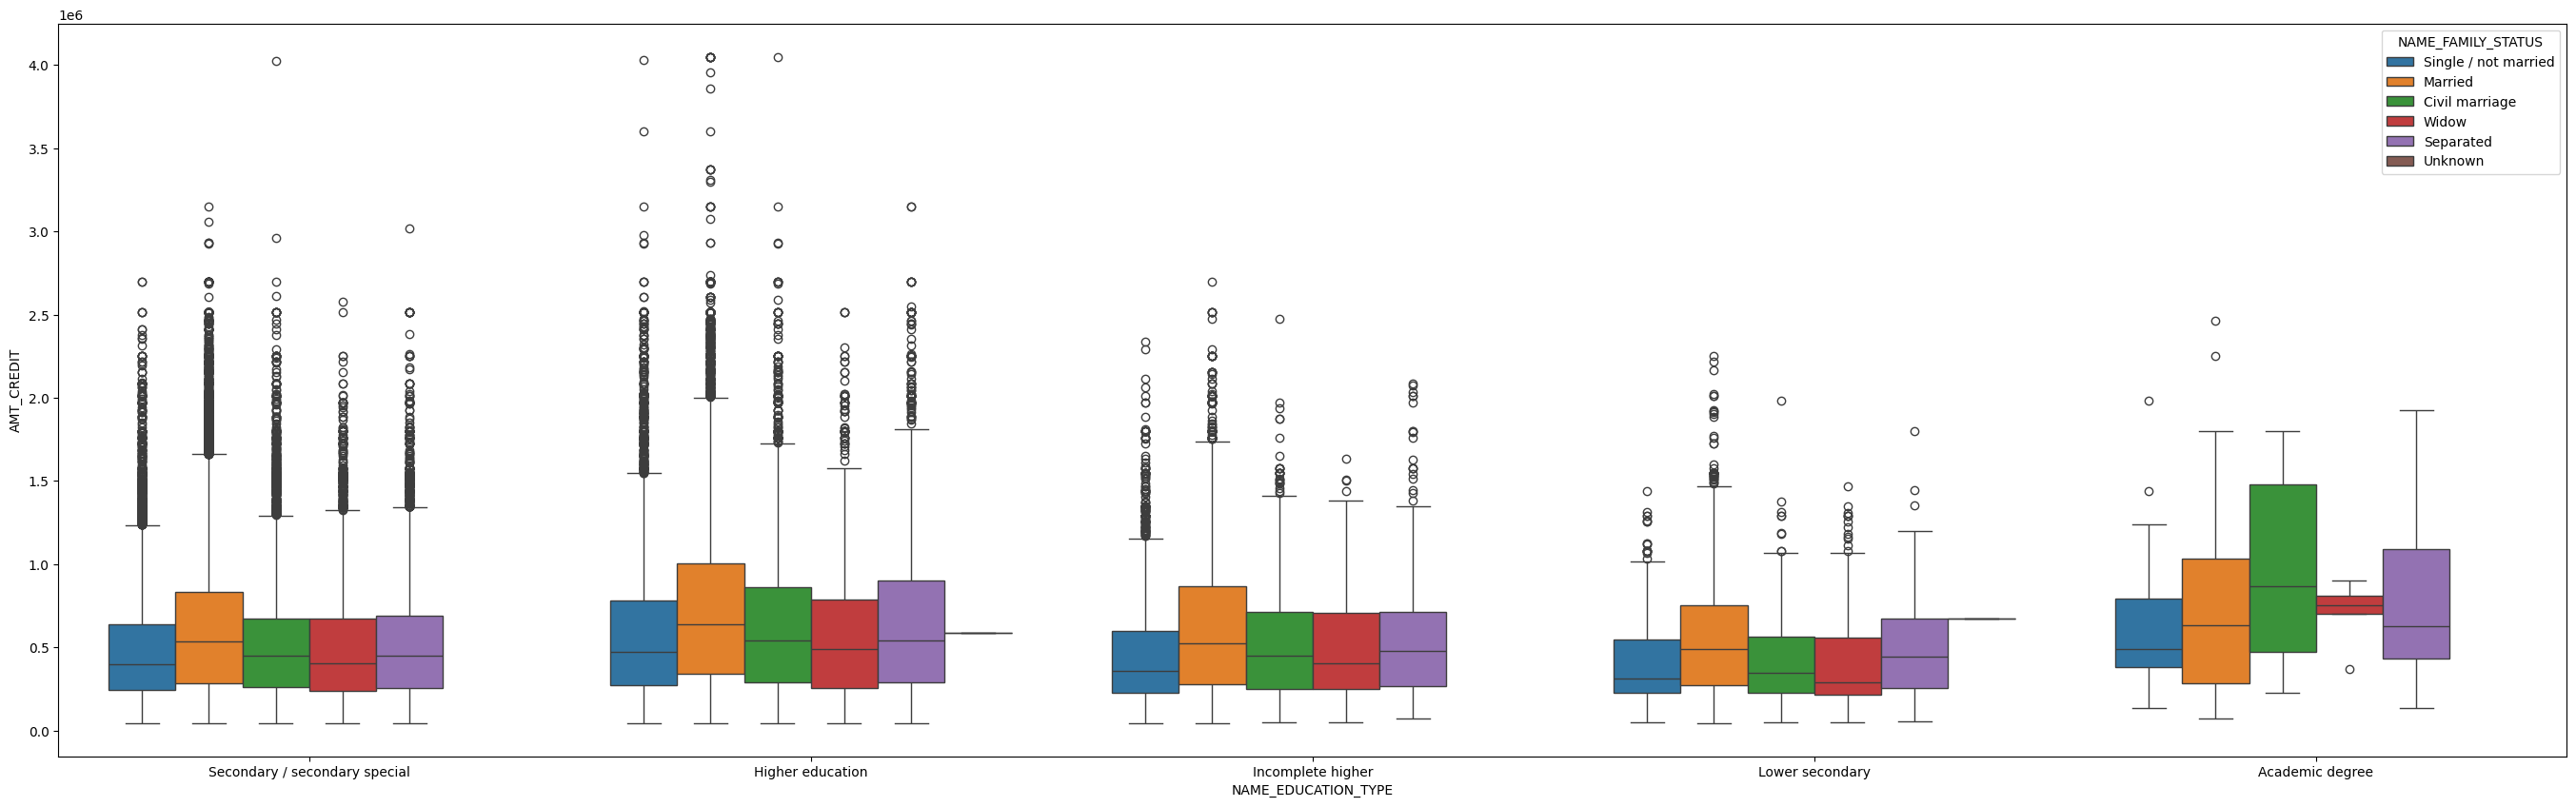

In [681]:
plt.figure(figsize=(34,10))
plot_1=sns.boxplot(y="AMT_CREDIT",x="NAME_EDUCATION_TYPE",data=df2,hue="NAME_FAMILY_STATUS")

Previous_application


In [682]:
df_previous=pd.read_csv("previous_application.csv")

In [683]:
df_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [684]:
#before ,merging or analysing lets remove the null columns
df_previous.shape

(1670214, 37)

In [685]:
null_percentage_2 = (df_previous.isnull().sum() / len(df_previous)) * 100
null_percentage_2

SK_ID_PREV                     0.000
SK_ID_CURR                     0.000
NAME_CONTRACT_TYPE             0.000
AMT_ANNUITY                   22.287
AMT_APPLICATION                0.000
AMT_CREDIT                     0.000
AMT_DOWN_PAYMENT              53.636
AMT_GOODS_PRICE               23.082
WEEKDAY_APPR_PROCESS_START     0.000
HOUR_APPR_PROCESS_START        0.000
FLAG_LAST_APPL_PER_CONTRACT    0.000
NFLAG_LAST_APPL_IN_DAY         0.000
RATE_DOWN_PAYMENT             53.636
RATE_INTEREST_PRIMARY         99.644
RATE_INTEREST_PRIVILEGED      99.644
NAME_CASH_LOAN_PURPOSE         0.000
NAME_CONTRACT_STATUS           0.000
DAYS_DECISION                  0.000
NAME_PAYMENT_TYPE              0.000
CODE_REJECT_REASON             0.000
NAME_TYPE_SUITE               49.120
NAME_CLIENT_TYPE               0.000
NAME_GOODS_CATEGORY            0.000
NAME_PORTFOLIO                 0.000
NAME_PRODUCT_TYPE              0.000
CHANNEL_TYPE                   0.000
SELLERPLACE_AREA               0.000
N

In [686]:
threshold = 30

# Identify columns with null values above the threshold
columns_to_remove_2 = null_percentage_2[null_percentage_2 > threshold].index
print("Columns with null values exceeding 30%:")
for column in columns_to_remove_2:
    print(column)
# Print identified columns
print(len(columns_to_remove_2))

Columns with null values exceeding 30%:
AMT_DOWN_PAYMENT
RATE_DOWN_PAYMENT
RATE_INTEREST_PRIMARY
RATE_INTEREST_PRIVILEGED
NAME_TYPE_SUITE
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL
11


In [687]:
#call the function created earlier
df3 = remove_columns_with_high_nulls(df_previous, 30)
df3.shape

(1670214, 26)

In [688]:
df3.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.000,17145.000,17145.000,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.000,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.000,679671.000,607500.000,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.000,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.000,136444.500,112500.000,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.000,470790.000,450000.000,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.000,404055.000,337500.000,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.000,high,Cash Street: high


In [689]:
df3.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [690]:
#checking the status of loan approval
unique_counts = df3['NAME_CONTRACT_STATUS'].value_counts()
total_rows = len(df3)

# Calculate the percentage for each unique value
percentage_unique_values = (unique_counts / total_rows) * 100

# Display the result
print(percentage_unique_values)

NAME_CONTRACT_STATUS
Approved       62.075
Canceled       18.939
Refused        17.404
Unused offer    1.583
Name: count, dtype: float64


We can see 62% were approved and 18% were canaceled

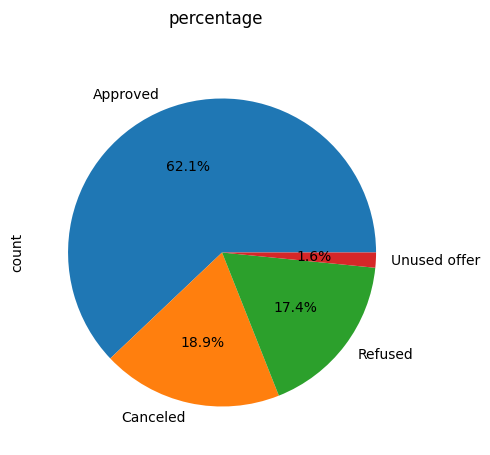

In [691]:
plot = unique_counts.plot.pie(y='percentage_unique_values', figsize=(5, 5), autopct='%1.1f%%', subplots=True,title='percentage')

NAME_CLIENT_TYPE
Repeater    73.719
New         18.043
Refreshed    8.122
XNA          0.116
Name: count, dtype: float64


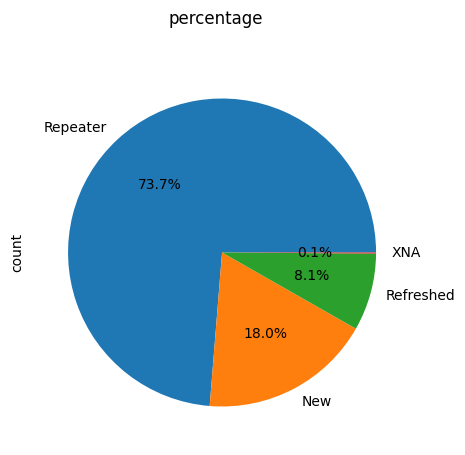

In [692]:
unique_counts_1 = df3['NAME_CLIENT_TYPE'].value_counts()
total_rows = len(df3)

# Calculate the percentage for each unique value
percentage_unique_values_1 = (unique_counts_1 / total_rows) * 100

# Display the result
print(percentage_unique_values_1)
plot_1 = unique_counts_1.plot.pie(y='percentage_unique_values_1', figsize=(5, 5), autopct='%1.1f%%', subplots=True,title='percentage')

CODE_REJECT_REASON
XAP      81.013
HC       10.492
LIMIT     3.334
SCO       2.243
CLIENT    1.583
SCOFR     0.767
XNA       0.314
VERIF     0.212
SYSTEM    0.043
Name: count, dtype: float64


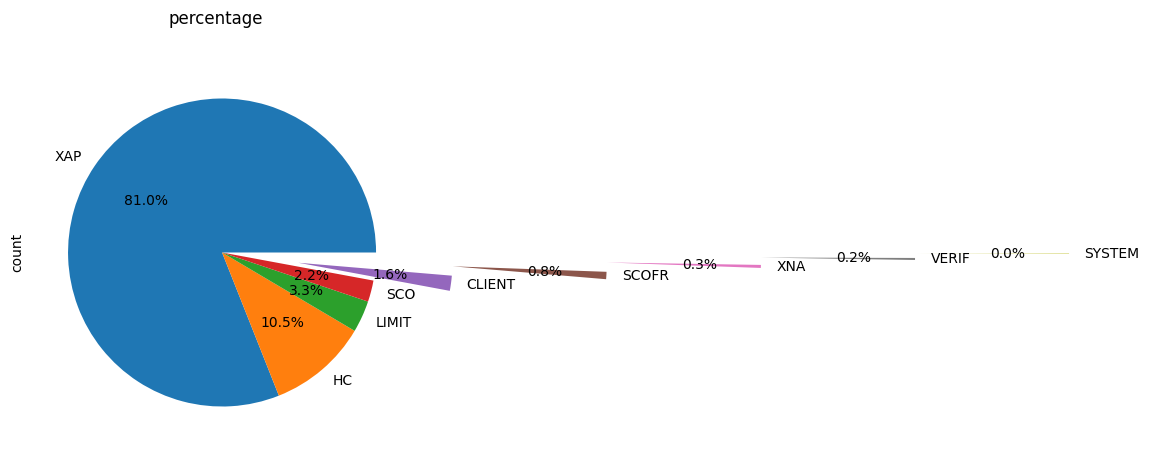

In [693]:
unique_counts_2 = df3['CODE_REJECT_REASON'].value_counts()
total_rows = len(df3)

# Calculate the percentage for each unique value
percentage_unique_values_2 = (unique_counts_2 / total_rows) * 100

# Display the result
print(percentage_unique_values_2)
explode=(0,0,0,0,0.5,1.5,2.5,3.5,4.5)
plot_1 = unique_counts_2.plot.pie(y='percentage_unique_values_2', figsize=(5, 5), autopct='%1.1f%%', subplots=True,title='percentage',explode=explode)

In [694]:
#Merging data
prev_current_df = pd.merge(df3,df2,how="inner",on="SK_ID_CURR")
prev_current_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413646 entries, 0 to 1413645
Data columns (total 56 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_PREV                    1413646 non-null  int64   
 1   SK_ID_CURR                    1413646 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413646 non-null  object  
 3   AMT_ANNUITY                   1106438 non-null  float64 
 4   AMT_APPLICATION               1413646 non-null  float64 
 5   AMT_CREDIT_x                  1413645 non-null  float64 
 6   AMT_GOODS_PRICE               1094130 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START_x  1413646 non-null  object  
 8   HOUR_APPR_PROCESS_START       1413646 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT   1413646 non-null  object  
 10  NFLAG_LAST_APPL_IN_DAY        1413646 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE        1413646 non-null  object  
 12  NAME_CONTRACT_

In [695]:
prev_current_df.drop(['SK_ID_CURR', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [696]:
prev_current_df.shape

(1413646, 48)

NAME_CASH_LOAN_PURPOSE
XAP                                 786905
XNA                                 567329
Repairs                              20117
Other                                13432
Urgent needs                          7236
Buying a used car                     2469
Building a house or an annex          2344
Everyday expenses                     2052
Medicine                              1871
Payments on other loans               1573
Education                             1334
Journey                               1041
Purchase of electronic equipment       934
Buying a new car                       886
Wedding / gift / holiday               801
Buying a home                          701
Car repairs                            691
Furniture                              660
Buying a holiday home / land           463
Business development                   359
Gasification / water supply            251
Buying a garage                        116
Hobby                          

<Axes: title={'center': 'Distribution of contract status with purposes'}, xlabel='count', ylabel='NAME_CASH_LOAN_PURPOSE'>

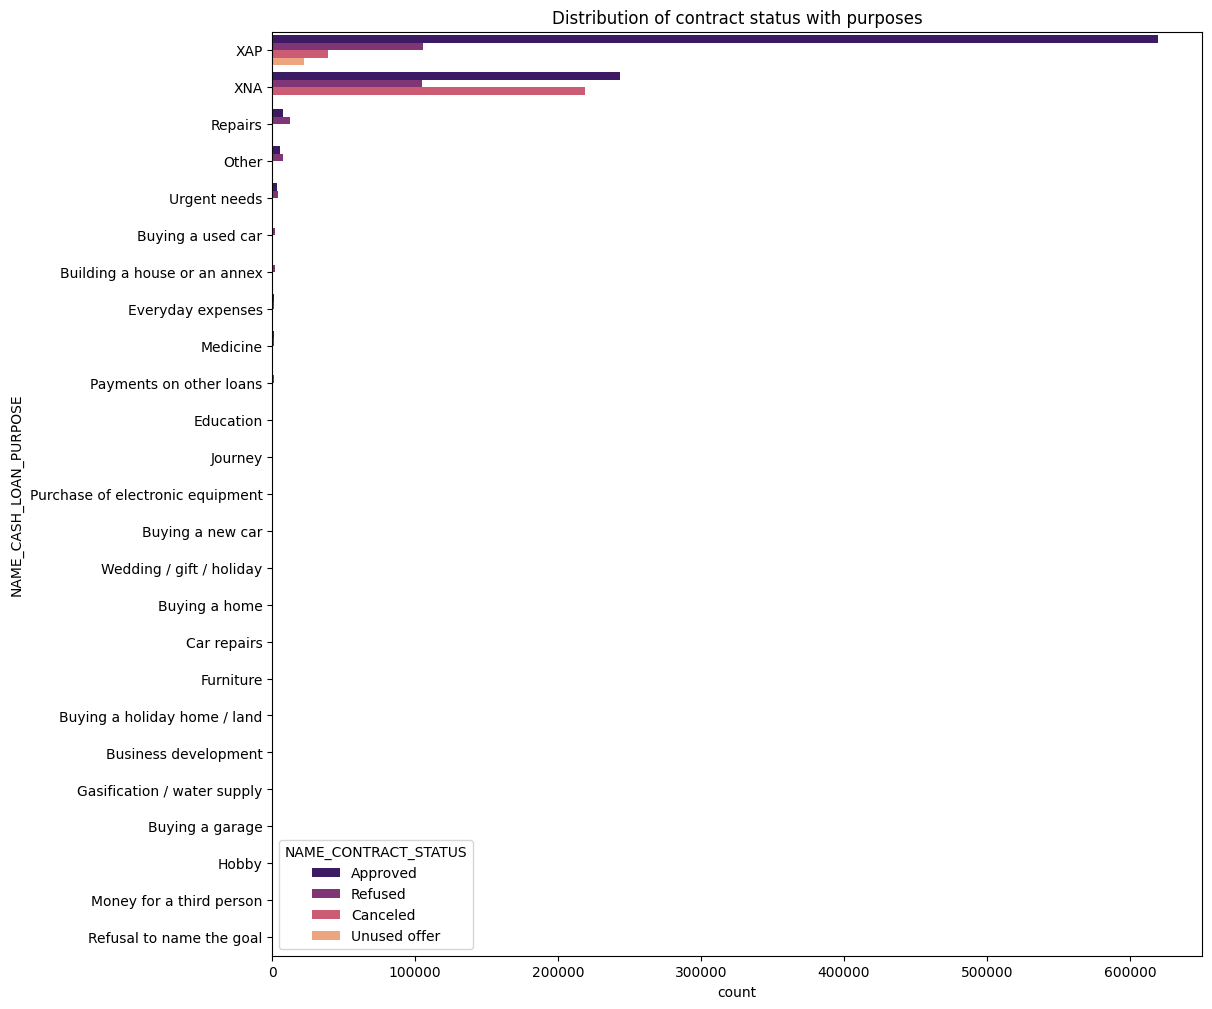

In [697]:
plt.figure(figsize=(12,12))
plt.title('Distribution of contract status with purposes')
print(prev_current_df['NAME_CASH_LOAN_PURPOSE'].value_counts())
sns.countplot(data = prev_current_df, y= 'NAME_CASH_LOAN_PURPOSE', order=prev_current_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

NAME_CASH_LOAN_PURPOSE
XAP                                 786905
XNA                                 567329
Repairs                              20117
Other                                13432
Urgent needs                          7236
Buying a used car                     2469
Building a house or an annex          2344
Everyday expenses                     2052
Medicine                              1871
Payments on other loans               1573
Education                             1334
Journey                               1041
Purchase of electronic equipment       934
Buying a new car                       886
Wedding / gift / holiday               801
Buying a home                          701
Car repairs                            691
Furniture                              660
Buying a holiday home / land           463
Business development                   359
Gasification / water supply            251
Buying a garage                        116
Hobby                          

<Axes: title={'center': 'Distribution of purposes with target '}, xlabel='count', ylabel='NAME_CASH_LOAN_PURPOSE'>

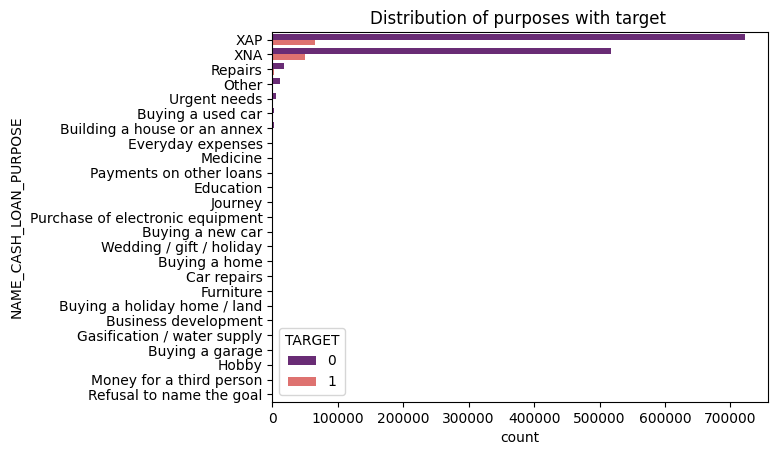

In [698]:
plt.title('Distribution of purposes with target ')
print(prev_current_df['NAME_CASH_LOAN_PURPOSE'].value_counts())
sns.countplot(data = prev_current_df, y= 'NAME_CASH_LOAN_PURPOSE', order=prev_current_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 

In [699]:

# Removing the column values of 'XNA' and 'XAP'

prev_current_df=prev_current_df.drop(prev_current_df[prev_current_df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_current_df=prev_current_df.drop(prev_current_df[prev_current_df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
prev_current_df=prev_current_df.drop(prev_current_df[prev_current_df['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)   

<Axes: title={'center': 'Distribution of contract status with purposes'}, xlabel='count', ylabel='NAME_CASH_LOAN_PURPOSE'>

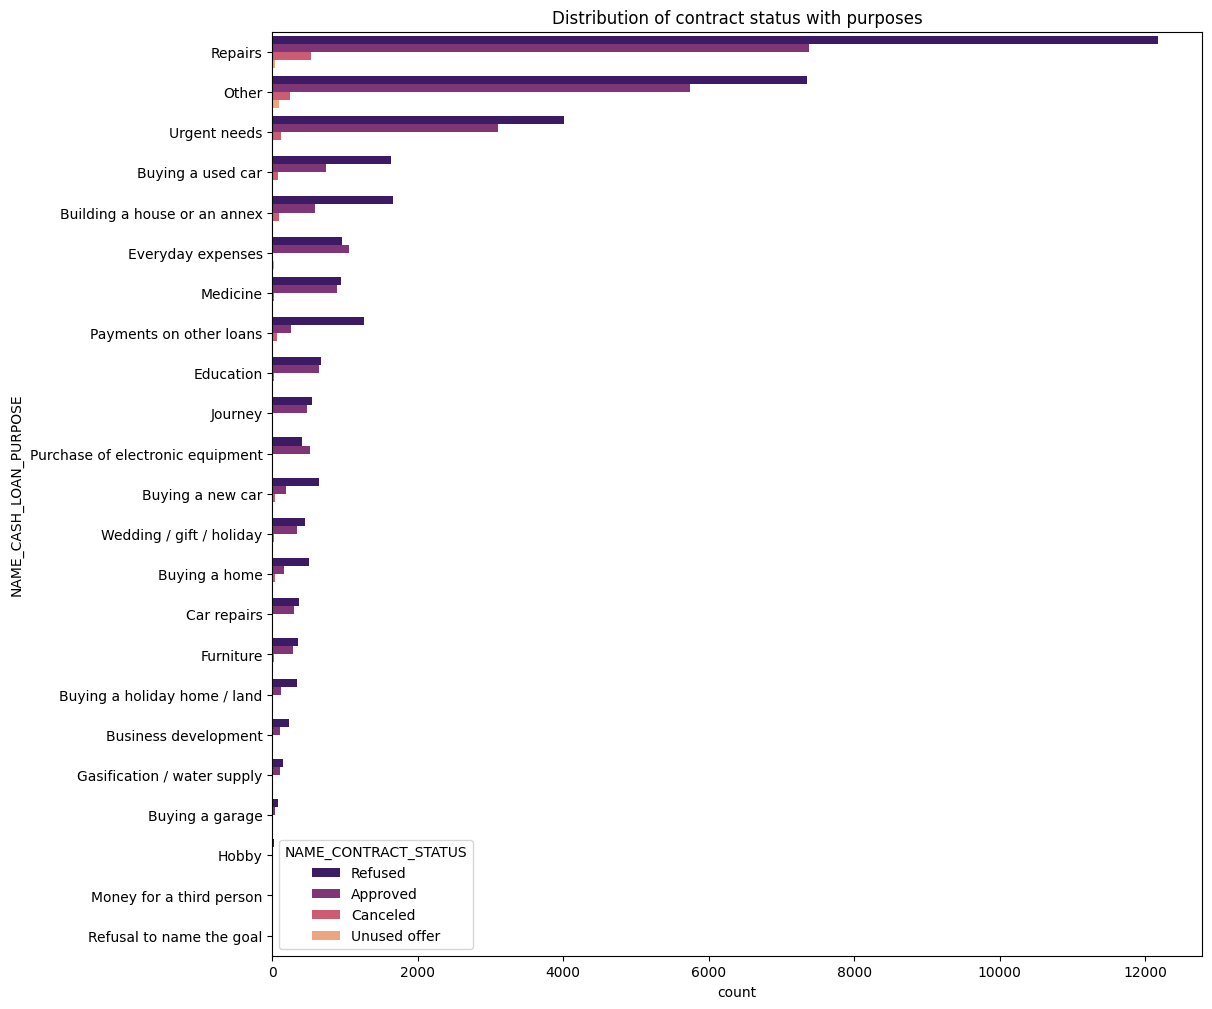

In [700]:
plt.figure(figsize=(12,12))
plt.title('Distribution of contract status with purposes')
sns.countplot(data = prev_current_df, y= 'NAME_CASH_LOAN_PURPOSE', order=prev_current_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')


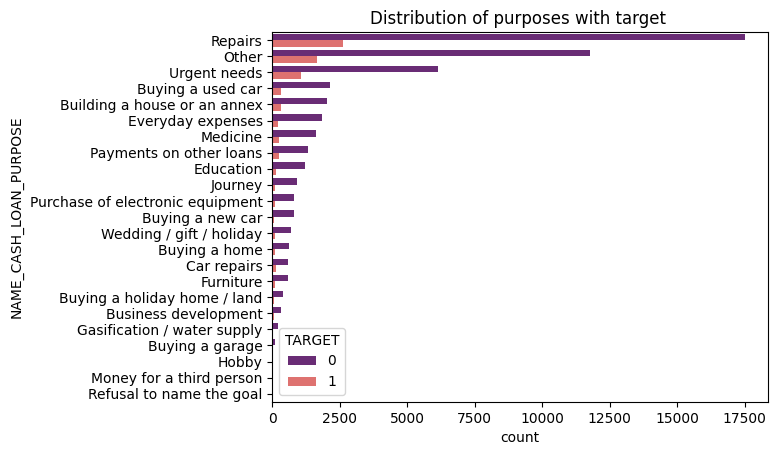

In [701]:
plt.title('Distribution of purposes with target ')
sns.countplot(data = prev_current_df, y= 'NAME_CASH_LOAN_PURPOSE', order=prev_current_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma') 
plt.show()

<Axes: xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_CREDIT_x'>

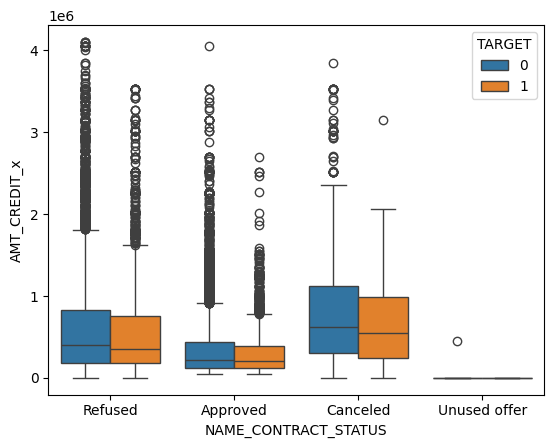

In [702]:
sns.boxplot(data=prev_current_df ,x="NAME_CONTRACT_STATUS",y="AMT_CREDIT_x",hue="TARGET")


<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_CREDIT_x'>

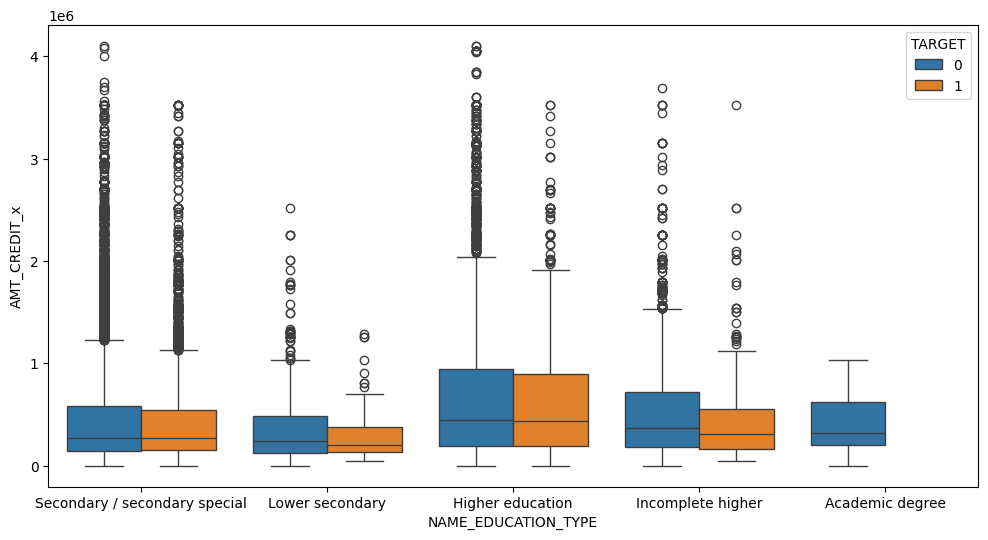

In [703]:
plt.figure(figsize=(12,6))
sns.boxplot(data=prev_current_df ,x="NAME_EDUCATION_TYPE",y="AMT_CREDIT_x",hue="TARGET")


<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='AMT_CREDIT_x'>

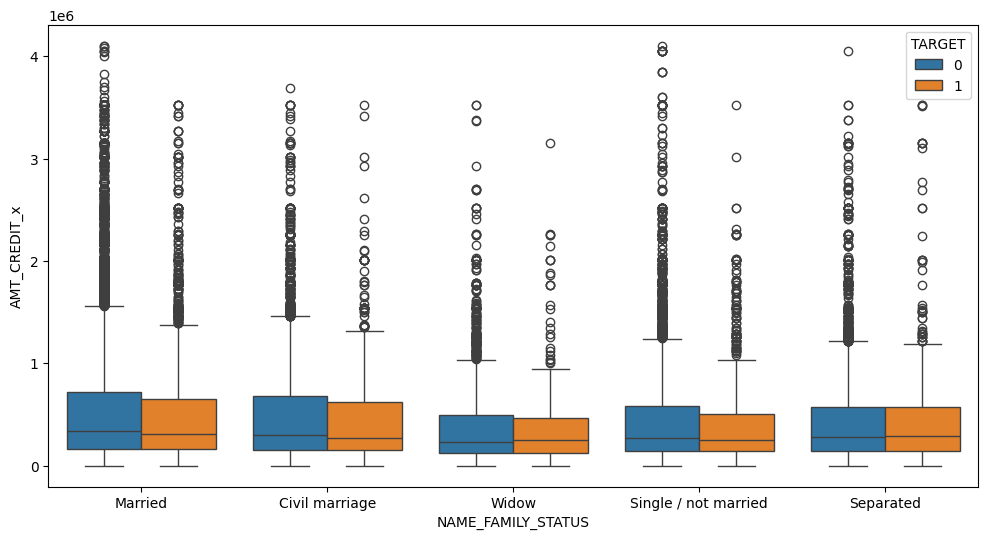

In [704]:
plt.figure(figsize=(12,6))
sns.boxplot(data=prev_current_df ,x="NAME_FAMILY_STATUS",y="AMT_CREDIT_x",hue="TARGET")

In [718]:
print(merged_heat_map)


NAME_INCOME_TYPE      Commercial associate  Pensioner  State servant  Student  \
NAME_CONTRACT_STATUS                                                            
Approved                           590.000    286.000        126.000    0.000   
Canceled                            43.000     10.000          4.000      NaN   
Refused                           1169.000    425.000        217.000      NaN   
Unused offer                         3.000      3.000          1.000      NaN   

NAME_INCOME_TYPE      Unemployed  Working  
NAME_CONTRACT_STATUS                       
Approved                   2.000 1580.000  
Canceled                     NaN   89.000  
Refused                    7.000 3170.000  
Unused offer                 NaN   14.000  


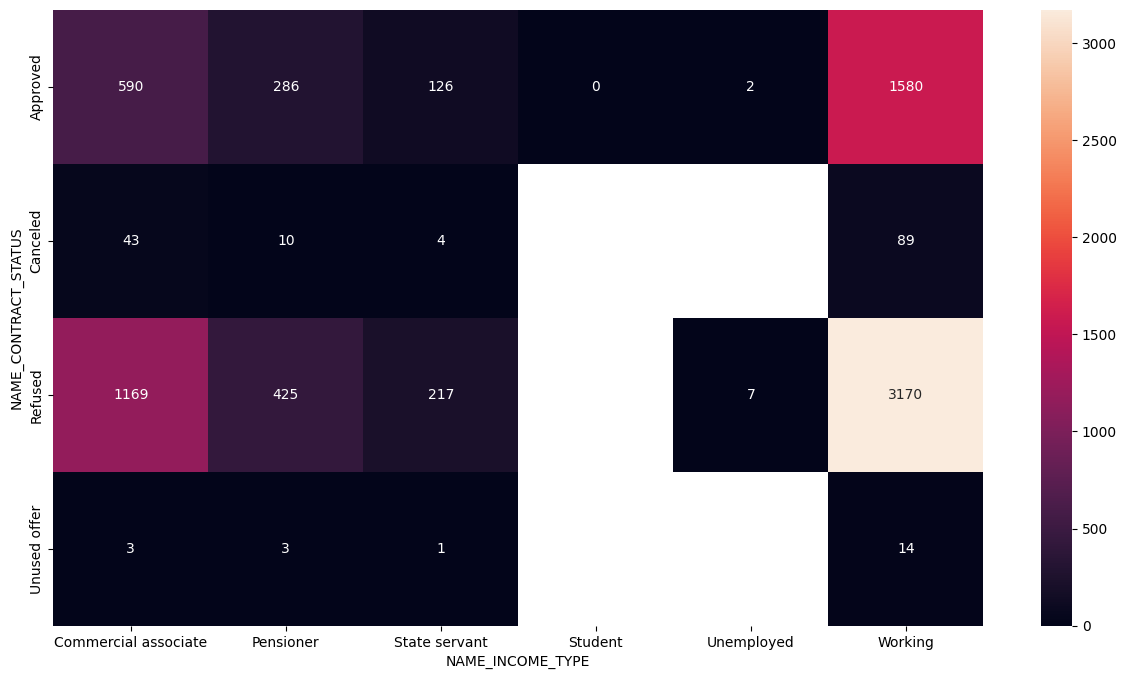

In [722]:
merged_heat_map =pd.pivot_table(data=prev_current_df,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(15,8))
sns.heatmap(merged_heat_map, annot=True, fmt="g")
plt.show()